# Clasificación

Importamos algunas librerías que vamos a utilizar   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Importamos el data set de vuelta

In [2]:
ds_properati = pd.read_csv('dataset_properati_train.csv')
ds_properati_test = pd.read_csv('dataset_properati_test.csv')
ds_properati.drop(columns=['Unnamed: 0'], inplace=True)
ds_properati_test.drop(columns=['Unnamed: 0'], inplace=True)
ds_properati.head() 

created_on    latitud   longitud        provincia        barrio operation  \
0  2021-03-10 -34.611523 -58.410394  Capital Federal     BALVANERA     Venta   
1  2021-04-16 -34.621782 -58.424452  Capital Federal       ALMAGRO     Venta   
2  2021-08-28 -34.592425 -58.515042  Capital Federal  VILLA DEVOTO     Venta   
3  2021-11-29 -34.607836 -58.446965  Capital Federal     CABALLITO     Venta   
4  2021-12-17 -34.561456 -58.467606  Capital Federal      BELGRANO     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0  Departamento             1.0                1.0                    49.0   
1  Departamento             1.0                1.0                    44.0   
2            PH             3.0                2.0                    76.0   
3  Departamento             2.0                1.0                    56.0   
4  Departamento             2.0                1.0                    55.0   

   property_surface_covered  property_price property_currency  
0                      45.0         79000.0               USD  
1                      40.0         99000.0               USD  
2                      66.0        160000.0               USD  
3                      50.0        153000.0               USD  
4                      45.0        159000.0               USD

In [3]:
ds_properati.shape

(39719, 13)

In [4]:
ds_properati_test.shape

(9866, 13)

In [5]:
ds_properati_test.columns

Index(['created_on', 'latitud', 'longitud', 'provincia', 'barrio', 'operation',
       'property_type', 'property_rooms', 'property_bedrooms',
       'property_surface_total', 'property_surface_covered', 'property_price',
       'property_currency'],
      dtype='object')

Importamos los datasets resultantes de aplicar PCA

In [6]:
ds_reducido_train = pd.read_csv("dataset_reducido_sin_price.csv")
ds_reducido_test = pd.read_csv("dataset_reducido_sin_price_test.csv")

ds_reducido_train.drop(columns='Unnamed: 0', inplace = True)
ds_reducido_test.drop(columns='Unnamed: 0', inplace = True)

#### Construcción del target

Para esta sección crearemos una nueva variable tipo_precio que tendrá tres categorías: alto, medio, bajo. Esta nueva variable será nuestra clase en el problema de clasificación. Para determinar cuando el tipo_precio de una propiedad es alto, medio o bajo se deberá analizar el precio por metro cuadrado (pxm2).

Se divide a la variable en un número específico de bins
Los criterios de agrupamiento pueden ser por ejemplo:
● Igual-Frecuencia: La misma cantidad de observaciones en un bin
● Igual-Ancho: Definimos rangos o intervalos de clases para cada bin
● Cuantiles: Separar en intervalos utilizando Mediana, Cuantiles, Percentiles.

Creamos una nueva columna precio por metro cuadrado en el dataframe.

In [7]:
ds_properati["precio_metro_cuadrado"] = ds_properati["property_price"] / ds_properati["property_surface_total"]
ds_properati_test["precio_metro_cuadrado"] = ds_properati_test["property_price"] / ds_properati_test["property_surface_total"]

Ahora la discretizamos en 3 intervalos de igual cantidad de observaciones.

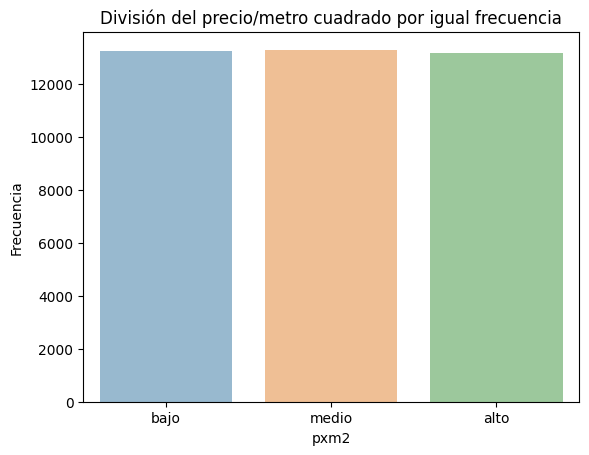

In [8]:
labels=["bajo","medio","alto"]
def dist_equitativa(dataframe):
    dataframe["pxm2_igual_frec"] = pd.qcut(dataframe["precio_metro_cuadrado"],q=3, labels=labels)

    ds_bygroup = dataframe.groupby(['pxm2_igual_frec']).count()  

    eje_x = ds_bygroup.index.tolist()  
    eje_y = ds_bygroup['precio_metro_cuadrado'].tolist()  

    sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_bygroup ,alpha=0.5).set(title="División del precio/metro cuadrado por igual frecuencia",ylabel='Frecuencia',xlabel='pxm2')
    plt.show()
    return dataframe
    
dataframe_copy = ds_properati.copy()
dataframe_equitativa = dist_equitativa(dataframe_copy)

Ahora dividimos en 3 intervalos, el primero con el 25% de las observaciones,
el siguiente con el 50% y el último con el 25% de las observaciones restantes.


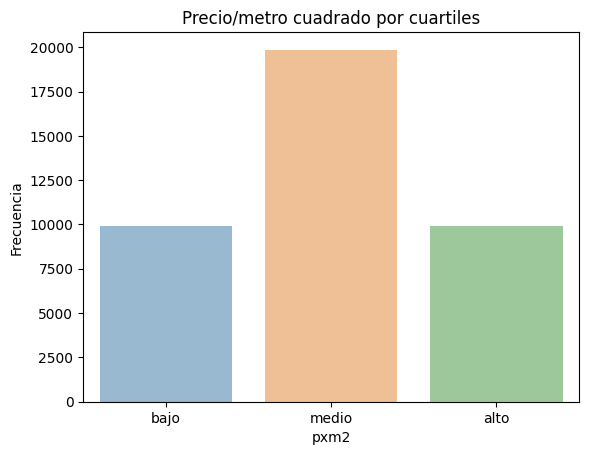

In [9]:
labels=["bajo","medio","alto"]
dataframe = ds_properati.copy()

def dist_25_50_25(dataframe, description):
    dataframe["pxm2_25_50_25"]=pd.qcut(dataframe["precio_metro_cuadrado"],q=[0,0.25,0.75,1], labels=labels)

    #Gráfico de barras con Seaborn
    ds_bygroup=dataframe.groupby(['pxm2_25_50_25']).count()  #Calculo la frecuencia de cada categoría

    eje_x = ds_bygroup.index.tolist()   ## Declaramos valores para el eje x
    eje_y = ds_bygroup['precio_metro_cuadrado'].tolist()  ## Declaramos valores para el eje y

    sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_bygroup ,alpha=0.5).set(title=description,ylabel='Frecuencia',xlabel='pxm2')
    plt.show()
    return dataframe
    
dataframe = ds_properati.copy()
dataframe_20_50_25 = dist_25_50_25(dataframe, "Precio/metro cuadrado por cuartiles")

Ahora vamos a filtrar por tipo de propiedad y luego dividir como en el punto anterior.

Primero con las propiedades tipo Departamento

Mostramos la distribución equitativa del tipo departamento

/tmp/ipykernel_3534/1932426118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_igual_frec"] = pd.qcut(dataframe["precio_metro_cuadrado"],q=3, labels=labels)


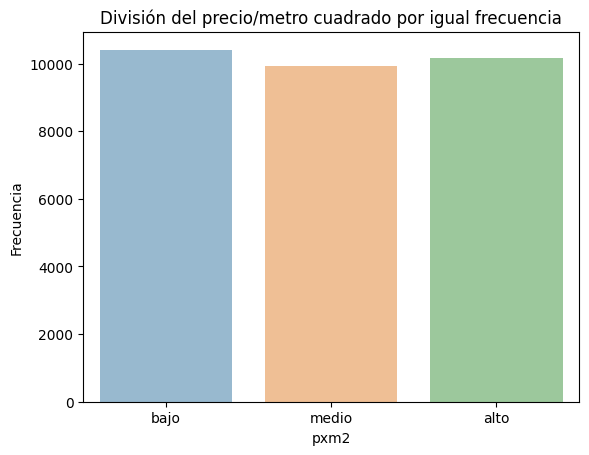

In [10]:
ds_properati_depto = ds_properati.loc[ds_properati["property_type"]=="Departamento"]
ds_equitativa_depto = dist_equitativa(ds_properati_depto)

Mostramos la distribución 25_50_25 del tipo departamento

/tmp/ipykernel_3534/3344619508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_25_50_25"]=pd.qcut(dataframe["precio_metro_cuadrado"],q=[0,0.25,0.75,1], labels=labels)


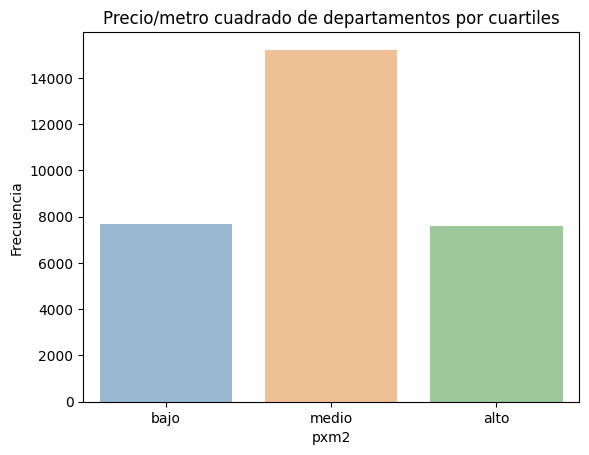

In [11]:
ds_properati_depto = ds_properati.loc[ds_properati["property_type"]=="Departamento"]
dataframe_depto_25_50_25 = dist_25_50_25(ds_properati_depto,"Precio/metro cuadrado de departamentos por cuartiles")

Mostramos la distribucion equitativa de la casa :

/tmp/ipykernel_3534/1932426118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_igual_frec"] = pd.qcut(dataframe["precio_metro_cuadrado"],q=3, labels=labels)


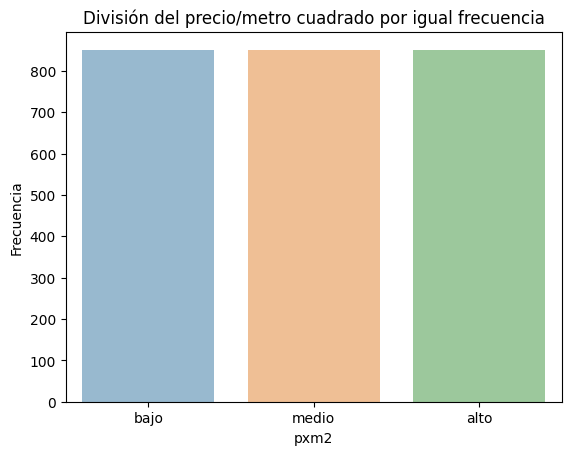

In [12]:
ds_properati_casa = ds_properati.loc[ds_properati["property_type"]=="Casa"]
ds_equitativa_casa = dist_equitativa(ds_properati_casa)

/tmp/ipykernel_3534/3344619508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_25_50_25"]=pd.qcut(dataframe["precio_metro_cuadrado"],q=[0,0.25,0.75,1], labels=labels)


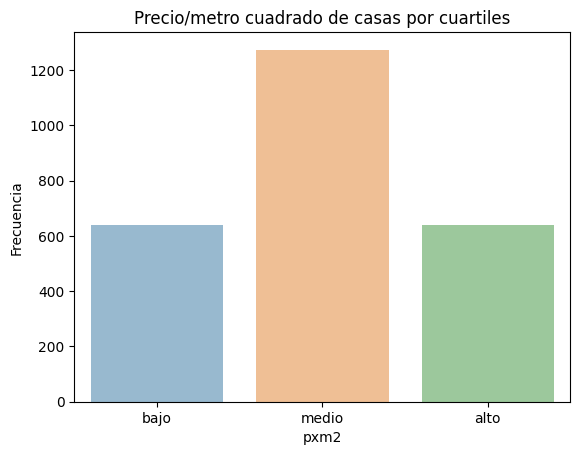

In [13]:
ds_properati_casa = ds_properati.loc[ds_properati["property_type"]=="Casa"]
dataframe_casa_25_50_25 = dist_25_50_25(ds_properati_casa, "Precio/metro cuadrado de casas por cuartiles")

Por ultimo mostramos del tipo Ph 

/tmp/ipykernel_3534/1932426118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_igual_frec"] = pd.qcut(dataframe["precio_metro_cuadrado"],q=3, labels=labels)


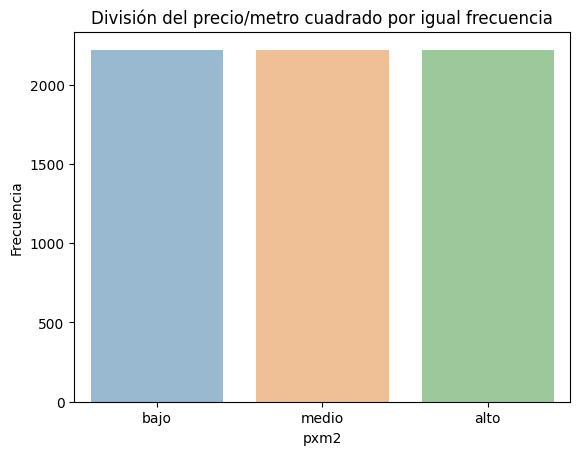

In [14]:
ds_properati_ph = ds_properati.loc[ds_properati["property_type"]=="PH"]
ds_equitativa_ph = dist_equitativa(ds_properati_ph)

/tmp/ipykernel_3534/3344619508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_25_50_25"]=pd.qcut(dataframe["precio_metro_cuadrado"],q=[0,0.25,0.75,1], labels=labels)


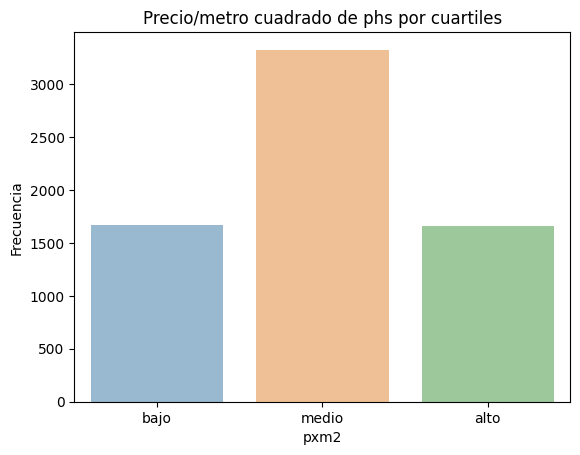

In [15]:
ds_properati_ph = ds_properati.loc[ds_properati["property_type"]=="PH"]
dataframe_ph_25_50_25 = dist_25_50_25(ds_properati_ph, "Precio/metro cuadrado de phs por cuartiles")

Mostramos la distribución del precio por metro cuadrado de todo el database:

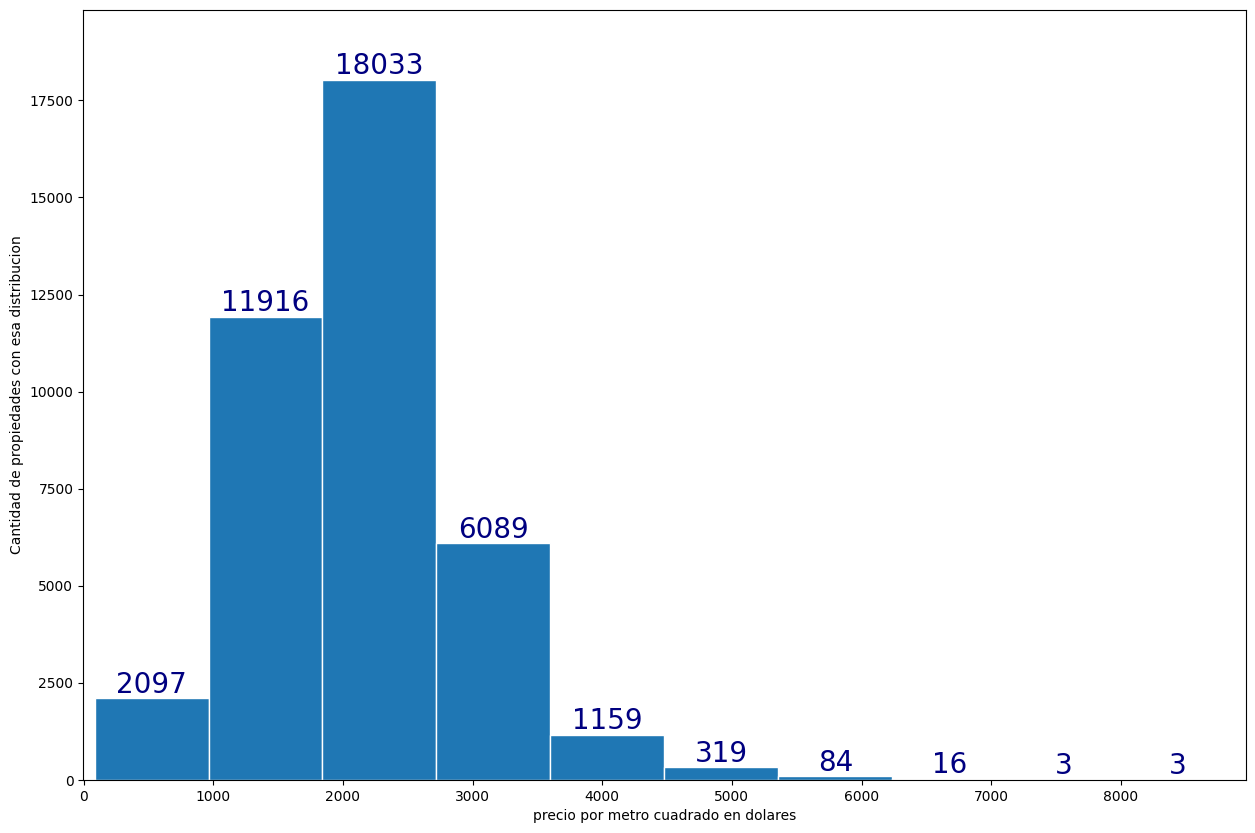

In [16]:

plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(ds_properati['precio_metro_cuadrado'], edgecolor='white')
plt.xlabel("precio por metro cuadrado en dolares")
plt.ylabel("Cantidad de propiedades con esa distribucion")
plt.title = ('Distribucion precio por metro cuadrado todo dataset')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()


Ahora mostramos la distribución del precio por metro cuadrado especificando el tipo de propiedad

1-Distribución de precio por metro cuadrado de departamentos:

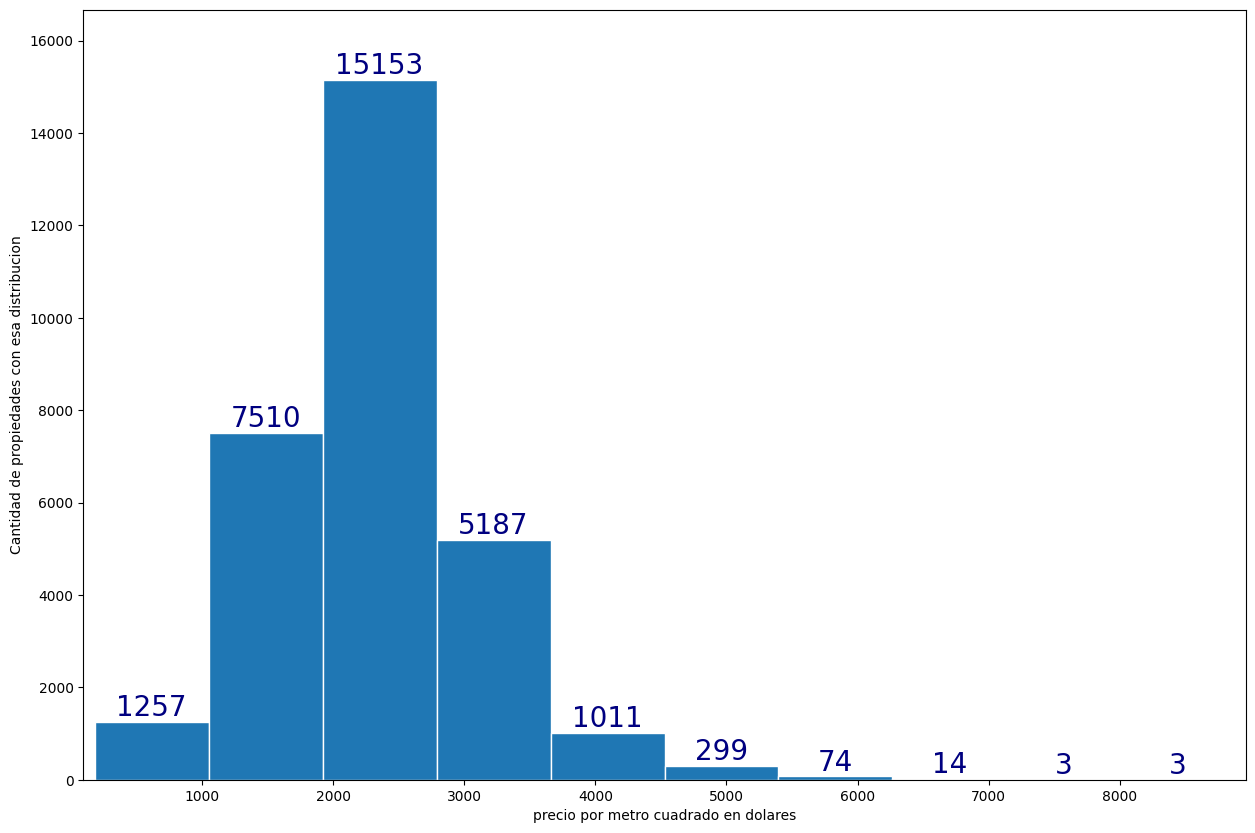

In [17]:
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(ds_properati_depto['precio_metro_cuadrado'], edgecolor='white')
plt.xlabel("precio por metro cuadrado en dolares")
plt.ylabel("Cantidad de propiedades con esa distribucion")
plt.title = ('Distrubcion precio por metro cuadrado de departamentos')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

2-Distribución de precio por metro cuadrado de casas:

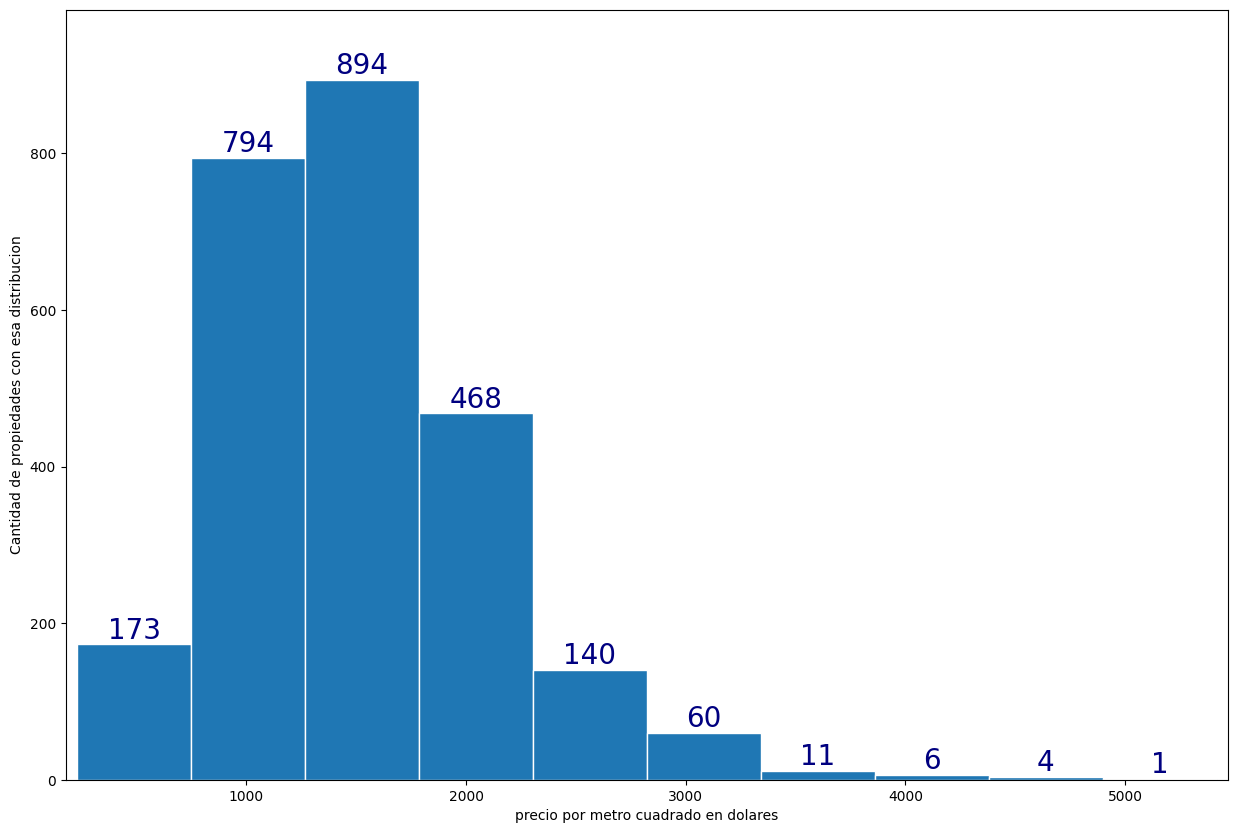

In [18]:
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(ds_properati_casa['precio_metro_cuadrado'], edgecolor='white')
plt.xlabel("precio por metro cuadrado en dolares")
plt.ylabel("Cantidad de propiedades con esa distribucion")
plt.title = ('Distrubcion precio por metro cuadrado de casas')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

3-Distribución de precio por metro cuadrado de PHs:

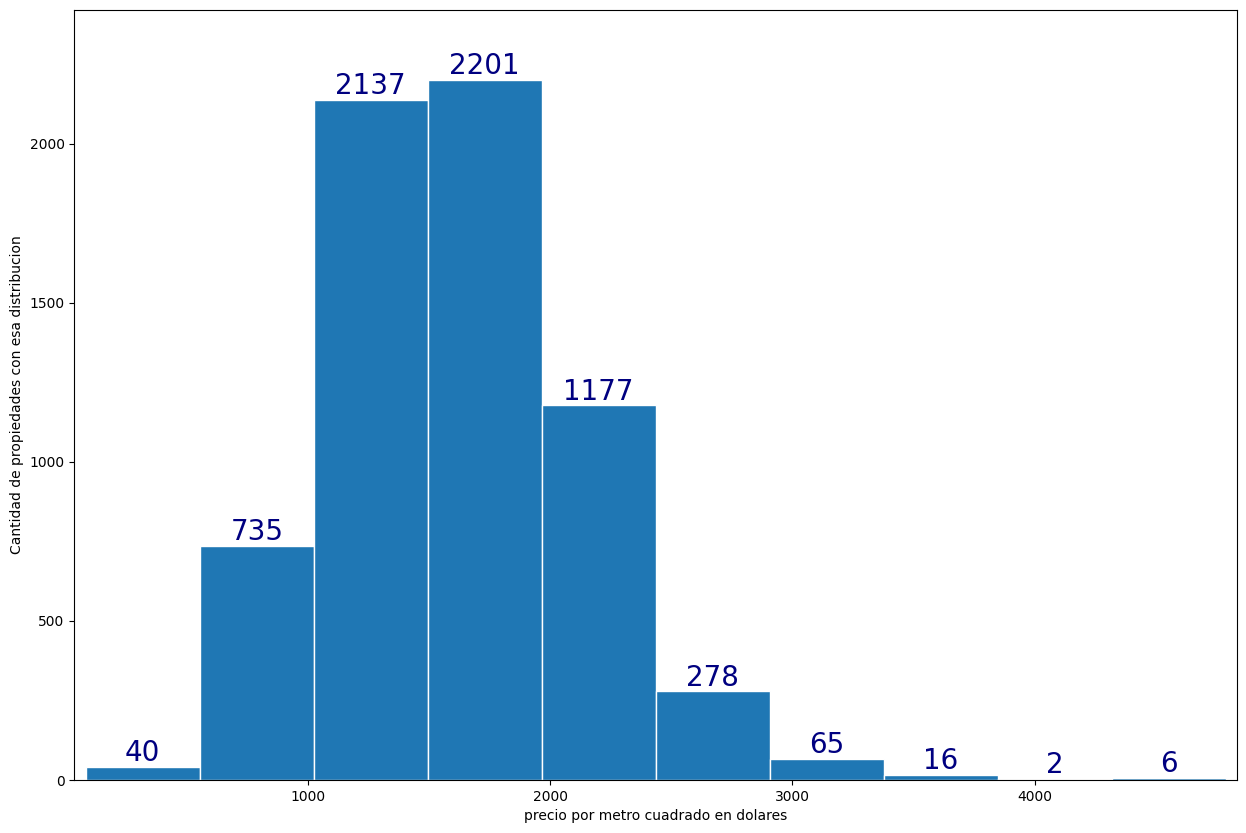

In [19]:
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(ds_properati_ph['precio_metro_cuadrado'], edgecolor='white')
plt.xlabel("precio por metro cuadrado en dolares")
plt.ylabel("Cantidad de propiedades con esa distribucion")
plt.title = ('Distrubcion precio por metro cuadrado de ph')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

### Selección de una alternativa para el análisis de la variable tipo_precio

Se determinó que la mejor alternativa para el análisis de la variable tipo_precio era trabajar la variable precio_metro_cuadrado en base al tipo_de_propiedad, separando a precio_metro_cuadrado en 3 intervalos con la misma cantidad de observaciones. Esto es para tener un dataset balanceado y que los modelos intenten predecir a las 3 clases de forma equitativa.

Al separar por tipo de propiedad se evita el problema de mezclar todos los tipos en uno solo, lo cual llevaría a hacer análisis erróneos.

Añadimos la columna "tipo_precio" al dataset original y reproducimos el etiquetado en test.

In [20]:
ds_properati.loc[ds_equitativa_casa.index,"tipo_precio"] = ds_equitativa_casa["pxm2_igual_frec"] 
ds_properati.loc[ds_equitativa_ph.index,"tipo_precio"] = ds_equitativa_ph["pxm2_igual_frec"] 
ds_properati.loc[ds_equitativa_depto.index,"tipo_precio"] = ds_equitativa_depto["pxm2_igual_frec"] 
ds_properati.head()

created_on    latitud   longitud        provincia        barrio operation  \
0  2021-03-10 -34.611523 -58.410394  Capital Federal     BALVANERA     Venta   
1  2021-04-16 -34.621782 -58.424452  Capital Federal       ALMAGRO     Venta   
2  2021-08-28 -34.592425 -58.515042  Capital Federal  VILLA DEVOTO     Venta   
3  2021-11-29 -34.607836 -58.446965  Capital Federal     CABALLITO     Venta   
4  2021-12-17 -34.561456 -58.467606  Capital Federal      BELGRANO     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0  Departamento             1.0                1.0                    49.0   
1  Departamento             1.0                1.0                    44.0   
2            PH             3.0                2.0                    76.0   
3  Departamento             2.0                1.0                    56.0   
4  Departamento             2.0                1.0                    55.0   

   property_surface_covered  property_price property_currency  \
0                      45.0         79000.0               USD   
1                      40.0         99000.0               USD   
2                      66.0        160000.0               USD   
3                      50.0        153000.0               USD   
4                      45.0        159000.0               USD   

   precio_metro_cuadrado tipo_precio  
0            1612.244898        bajo  
1            2250.000000       medio  
2            2105.263158        alto  
3            2732.142857        alto  
4            2890.909091        alto

In [21]:
def ds_por_propiedad_y_tipo_precio(property_type, tipo_precio):
    return (ds_properati.loc[(ds_properati.property_type == property_type) & (ds_properati.tipo_precio == tipo_precio)]).iloc[:,13]

In [22]:
#buscamos los umbrales de precio discretizados por tipo de propiedad
ds_bajo_dpto = ds_por_propiedad_y_tipo_precio("Departamento","bajo")
ds_medio_dpto = ds_por_propiedad_y_tipo_precio("Departamento","medio")
ds_alto_dpto = ds_por_propiedad_y_tipo_precio("Departamento","alto")

ds_bajo_ph = ds_por_propiedad_y_tipo_precio("PH","bajo")
ds_medio_ph = ds_por_propiedad_y_tipo_precio("PH","medio")
ds_alto_ph = ds_por_propiedad_y_tipo_precio("PH","alto")

ds_bajo_casa = ds_por_propiedad_y_tipo_precio("Casa","bajo")
ds_medio_casa = ds_por_propiedad_y_tipo_precio("Casa","medio")
ds_alto_casa = ds_por_propiedad_y_tipo_precio("Casa","alto")


max_depto_precio_bajo = ds_bajo_dpto.max()
max_ph_precio_bajo = ds_bajo_ph.max()
max_casa_precio_bajo = ds_bajo_casa.max()
max_depto_precio_medio = ds_medio_dpto.max()
max_ph_precio_medio = ds_medio_ph.max()
max_casa_precio_medio = ds_medio_casa.max()
max_depto_precio_alto = ds_alto_dpto.max()
max_ph_precio_alto = ds_alto_ph.max()
max_casa_precio_alto = ds_alto_casa.max()

min_depto_precio_bajo = ds_bajo_dpto.min()
min_ph_precio_bajo = ds_bajo_ph.min()
min_casa_precio_bajo = ds_bajo_casa.min()
min_depto_precio_medio = ds_medio_dpto.min()
min_ph_precio_medio = ds_medio_ph.min()
min_casa_precio_medio = ds_medio_casa.min()
min_depto_precio_alto = ds_alto_dpto.min()
min_ph_precio_alto = ds_alto_ph.min()
min_casa_precio_alto = ds_alto_casa.min()

In [23]:
def ds_test_ptype_por_umbral(min, max, property_type):
    ds_ptype = ds_properati_test.loc[ds_properati_test.property_type == property_type]
    return ds_ptype[(ds_ptype.precio_metro_cuadrado >= min) & (ds_ptype.precio_metro_cuadrado < max)]

In [24]:
#etiquetamos test según los umbrales
casa_medio = ds_test_ptype_por_umbral(min_casa_precio_medio, max_casa_precio_medio, "Casa")
casa_alto = ds_test_ptype_por_umbral(min_casa_precio_alto, max_casa_precio_alto, "Casa")
casa_bajo = ds_test_ptype_por_umbral(min_casa_precio_bajo, max_casa_precio_bajo, "Casa")
ph_medio = ds_test_ptype_por_umbral(min_ph_precio_medio, max_ph_precio_medio, "PH")
ph_alto = ds_test_ptype_por_umbral(min_ph_precio_alto, max_ph_precio_alto, "PH")
ph_bajo = ds_test_ptype_por_umbral(min_ph_precio_bajo, max_ph_precio_bajo, "PH")
dpto_medio = ds_test_ptype_por_umbral(min_depto_precio_medio, max_depto_precio_medio, "Departamento")
dpto_bajo =  ds_test_ptype_por_umbral(min_depto_precio_bajo, max_depto_precio_bajo, "Departamento")
dpto_alto =  ds_test_ptype_por_umbral(min_depto_precio_alto, max_depto_precio_alto, "Departamento")

ds_properati_test.loc[casa_bajo.index, "tipo_precio"] = "bajo"
ds_properati_test.loc[casa_alto.index, "tipo_precio"] = "alto"
ds_properati_test.loc[casa_medio.index, "tipo_precio"] = "medio"

ds_properati_test.loc[ph_bajo.index, "tipo_precio"] = "bajo"
ds_properati_test.loc[ph_alto.index, "tipo_precio"] = "alto"
ds_properati_test.loc[ph_medio.index, "tipo_precio"] = "medio" 

ds_properati_test.loc[dpto_bajo.index, "tipo_precio"] = "bajo"
ds_properati_test.loc[dpto_alto.index, "tipo_precio"] = "alto"
ds_properati_test.loc[dpto_medio.index, "tipo_precio"] = "medio"
ds_properati_test.tipo_precio.unique()

array(['medio', 'alto', 'bajo', nan], dtype=object)

In [25]:
nans_test_tipo_precio = ds_properati_test[ds_properati_test.tipo_precio.isna()]
nans_test_tipo_precio

created_on    latitud   longitud        provincia            barrio  \
322   2021-09-23 -34.574679 -58.441438  Capital Federal           PALERMO   
491   2021-08-27 -34.586636 -58.439412  Capital Federal           PALERMO   
506   2021-12-16 -34.620619 -58.426087  Capital Federal           ALMAGRO   
507   2021-03-20 -34.601887 -58.467710  Capital Federal          PATERNAL   
1024  2021-05-11 -34.608678 -58.483113  Capital Federal  VILLA DEL PARQUE   
...          ...        ...        ...              ...               ...   
9509  2021-04-30 -34.617978 -58.362848  Capital Federal     PUERTO MADERO   
9588  2021-04-20 -34.632461 -58.370587  Capital Federal          BARRACAS   
9638  2021-08-03 -34.607190 -58.394906  Capital Federal         BALVANERA   
9748  2021-10-14 -34.597838 -58.486119  Capital Federal  VILLA DEL PARQUE   
9814  2021-08-31 -34.634263 -58.477113  Capital Federal          FLORESTA   

     operation property_type  property_rooms  property_bedrooms  \
322      Venta  Departamento             2.0                1.0   
491      Venta  Departamento             1.0                1.0   
506      Venta  Departamento             2.0                1.0   
507      Venta  Departamento             2.0                1.0   
1024     Venta  Departamento             2.0                1.0   
...        ...           ...             ...                ...   
9509     Venta  Departamento             1.0                1.0   
9588     Venta  Departamento             1.0                1.0   
9638     Venta  Departamento             2.0                1.0   
9748     Venta  Departamento             1.0                1.0   
9814     Venta  Departamento             1.0                1.0   

      property_surface_total  property_surface_covered  property_price  \
322                     48.0                      48.0         96000.0   
491                     36.0                      32.0         72000.0   
506                     46.0                      40.0         92000.0   
507                     35.0                      35.0         70000.0   
1024                    41.0                      41.0         82000.0   
...                      ...                       ...             ...   
9509                    37.0                      31.0        330000.0   
9588                    40.0                      36.0         80000.0   
9638                    30.0                      30.0         60000.0   
9748                    25.0                      25.0         50000.0   
9814                    36.0                      33.0         72000.0   

     property_currency  precio_metro_cuadrado tipo_precio  
322                USD            2000.000000         NaN  
491                USD            2000.000000         NaN  
506                USD            2000.000000         NaN  
507                USD            2000.000000         NaN  
1024               USD            2000.000000         NaN  
...                ...                    ...         ...  
9509               USD            8918.918919         NaN  
9588               USD            2000.000000         NaN  
9638               USD            2000.000000         NaN  
9748               USD            2000.000000         NaN  
9814               USD            2000.000000         NaN  

[92 rows x 15 columns]

Tenemos filas que quedaron sin clasificar, etiquetamos de nuevo sabiendo que si es Casa o PH es 'alto', si es Departamento es 'bajo':

In [26]:
ds_properati[ds_properati.precio_metro_cuadrado == 2000.0]

created_on    latitud   longitud        provincia            barrio  \
92     2021-11-22 -34.595095 -58.384297  Capital Federal          RECOLETA   
352    2021-06-10 -34.568029 -58.453777  Capital Federal        COLEGIALES   
388    2021-09-28 -34.621000 -58.446765  Capital Federal         CABALLITO   
503    2021-11-23 -34.630941 -58.468114  Capital Federal            FLORES   
519    2021-10-08 -34.620778 -58.502573  Capital Federal          FLORESTA   
...           ...        ...        ...              ...               ...   
39206  2021-04-10 -34.597748 -58.412461  Capital Federal      BARRIO NORTE   
39388  2021-09-18 -34.611005 -58.400321  Capital Federal         BALVANERA   
39418  2021-09-08 -34.615040 -58.498271  Capital Federal      MONTE CASTRO   
39508  2021-07-28 -34.625042 -58.414813  Capital Federal             BOEDO   
39563  2021-09-03 -34.599787 -58.497452  Capital Federal  VILLA DEL PARQUE   

      operation property_type  property_rooms  property_bedrooms  \
92        Venta  Departamento             2.0                1.0   
352       Venta  Departamento             2.0                1.0   
388       Venta  Departamento             2.0                1.0   
503       Venta  Departamento             2.0                1.0   
519       Venta  Departamento             1.0                1.0   
...         ...           ...             ...                ...   
39206     Venta  Departamento             2.0                1.0   
39388     Venta  Departamento             2.0                1.0   
39418     Venta  Departamento             2.0                1.0   
39508     Venta  Departamento             1.0                1.0   
39563     Venta            PH             3.0                2.0   

       property_surface_total  property_surface_covered  property_price  \
92                       38.0                      38.0         76000.0   
352                      40.0                      38.0         80000.0   
388                      60.0                      40.0        120000.0   
503                      48.0                      45.0         96000.0   
519                      33.0                      29.0         66000.0   
...                       ...                       ...             ...   
39206                    36.0                      36.0         72000.0   
39388                    36.0                      36.0         72000.0   
39418                    45.0                      43.0         90000.0   
39508                    18.0                      18.0         36000.0   
39563                    94.0                      68.0        188000.0   

      property_currency  precio_metro_cuadrado tipo_precio  
92                  USD                 2000.0        bajo  
352                 USD                 2000.0        bajo  
388                 USD                 2000.0        bajo  
503                 USD                 2000.0        bajo  
519                 USD                 2000.0        bajo  
...                 ...                    ...         ...  
39206               USD                 2000.0        bajo  
39388               USD                 2000.0        bajo  
39418               USD                 2000.0        bajo  
39508               USD                 2000.0        bajo  
39563               USD                 2000.0        alto  

[418 rows x 15 columns]

In [27]:
casa_ph_nans = nans_test_tipo_precio.loc[(nans_test_tipo_precio.property_type == 'Casa') | (nans_test_tipo_precio.property_type == 'PH')]
dpto_nans = nans_test_tipo_precio.loc[nans_test_tipo_precio.property_type == 'Departamento']

ds_properati_test.loc[casa_ph_nans.index, "tipo_precio"] = "alto"
ds_properati_test.loc[dpto_nans.index, "tipo_precio"] = "bajo"
ds_properati_test.tipo_precio.unique()

array(['medio', 'alto', 'bajo'], dtype=object)

Finalmente tenemos las observaciones de test clasificadas según los umbrales definidos en train.

### Gráfico CABA

Graficamos los avisos coloreados según la alternativa elegida:

In [28]:
!pip install geopandas
import geopandas as gp
from seaborn import color_palette

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


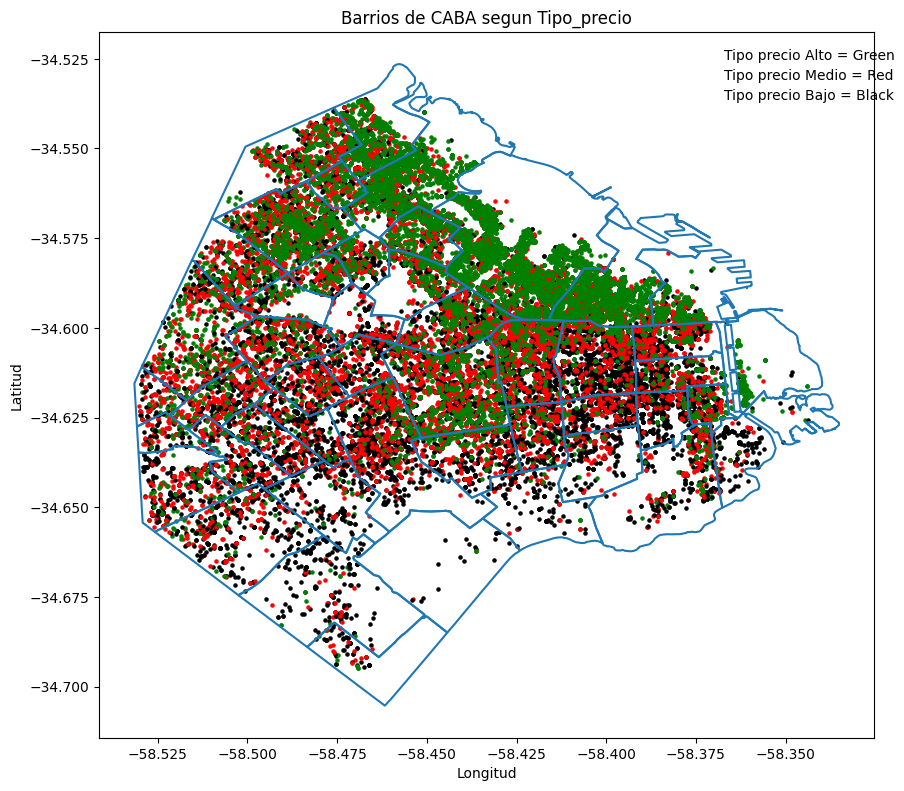

In [29]:
def points_segun_tipo(dataframe,tipo):
    dataframe_tipo = dataframe[dataframe["pxm2_igual_frec"] == tipo]
    latitud = dataframe_tipo.latitud
    longitud = dataframe_tipo.longitud
    points = gp.GeoDataFrame(dataframe_tipo, geometry=gp.points_from_xy(longitud,latitud)) 
    return points

def graficar_caba(lista_dataframe):
    fig, ax = plt.subplots(figsize=(10,10))
    poligonos = gp.read_file("barrios.geojson")
    ax.set_title('Barrios de CABA segun Tipo_precio')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    poligonos.boundary.plot(ax=ax);
    for dataframe in lista_dataframe:
        points_bajos = points_segun_tipo(dataframe,"bajo")
        points_bajos.plot(ax=ax,markersize=5,color="black")

        points_medio = points_segun_tipo(dataframe,"medio")
        points_medio.plot(ax=ax,markersize=5,color="red")

        points_alto = points_segun_tipo(dataframe,"alto")
        points_alto.plot(ax=ax,markersize=5,color="green")
    plt.figtext(.75, .82, "Tipo precio Alto = Green")
    plt.figtext(.75, .80, "Tipo precio Medio = Red")
    plt.figtext(.75, .78, "Tipo precio Bajo = Black")

    plt.show()

tres_datas = [ds_equitativa_casa,ds_equitativa_ph,ds_equitativa_depto]
graficar_caba(tres_datas)

Compararemos esta clasificación contra el agrupamiento resultante de k-means. Para eso importamos el plot obtenido en kmeans.
![](mapaKmeans.png)

Vemos que:
- En la zona de la costanera y Puerto Madero en ambos casos está coloreada más "fuerte" indicando precios más altos.
- Por Villa Soldati y zonas adyacentes de menos recursos notamos que en ambos casos aparecen puntos de color más oscuro.
- En las zonas intermedias de la ciudad hay una mezcla de los 3 tipos.

### Entrenamiento y Predicción

En esta parte se pide predecir el valor del tipo_precio excluyendo la variable price, precio por metro cuadrado y otra que pueda contener información del precio de venta.

Para cumplir con lo pedido se hacen uso de distintos modelos que permiten predecir el valor de la variable tipo_precio:

- Árbol de decisión.

-  Random forest.

- KNN.

Para cada uno de los modelos trabajados es necesario hacer un trabajo de transformación de datos, de forma de tener un buen rendimiento en cada modelo usado. Es necesario realizar transformaciones sobre variables categóricas de forma que tengan valores numéricos. Para poder realizar dicha transformación se hace uso de la técnica de One Hot Encoding.

Importamos las librerías que usaremos

In [30]:
#modelos y métricas
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Creamos un dataset con los features que usaremos para clasificar

In [31]:
ds_properati.columns.to_list()


['created_on',
 'latitud',
 'longitud',
 'provincia',
 'barrio',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'precio_metro_cuadrado',
 'tipo_precio']

Convertimos la columna de precio_metro_cuadrado a int para usarla en el random forest.

In [32]:
ds_properati['precio_metro_cuadrado'] = ds_properati['precio_metro_cuadrado'].astype(int)

In [33]:
#Verifico balanceo de clases
ds_properati['tipo_precio'].value_counts(normalize=True)*100

bajo     33.940935
alto     33.326620
medio    32.732445
Name: tipo_precio, dtype: float64

Generamos los conjuntos x e y para train y test

In [34]:
x_train = ds_properati.drop(['property_price','precio_metro_cuadrado','tipo_precio'], axis='columns', inplace=False)
x_test = ds_properati_test.drop(['property_price','precio_metro_cuadrado','tipo_precio'], axis='columns', inplace=False)

y_train = ds_properati.tipo_precio.copy()
y_test = ds_properati_test.tipo_precio.copy()

In [35]:
#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

# Datos Entrenamiento: 39719
# Datos Prueba: 9866


A continuación se usarán distintos modelos de clasificación, cada uno con sus particularidades en cuanto a funcionamiento, y a como realizan la clasificación. Sin embargo, tienen en común métricas que permiten determinar la eficiencia de un modelo de uno sobre otro, las mismas serán descritas a continuación.

### Métricas de clasificación

Cuando se crean distintos modelos de clasificación (Regresión Logística, RandomForestClassifier, etc), interesa conocer si el modelo está clasificando correctamente lo que se desea clasificar.

Existen distintas métricas que permiten medir el rendimiento de un modelo; que tan preciso es, sus errores, etc. Estas resultan útiles en algunos casos, pero en otros pueden llegar a  generar confunsión, por ende, es muy importante tener bien claro que es lo que se está midiendo.

Si se tiene un conjunto de clasificaciones hechas para un problema (sean erróneas o no), se define:

- TP (true possitive): Cantidad de clasificaciones positivas correctas.
- TN (true negative): Cantidad de clasificaciones negativas correctas.
- FN (false negative): Cantidad de clasificaciones negativas incorrectas.
- FP (false possitive): Cantidad de clasificaciones positivas incorrectas.
- Exactitud (accuracy) = $\frac{TP+TN}{TP+TN+FP+FN}$  es la fracción de predicciones que el modelo realizó correctamente sobre el total.
    
    La exactitud por sí sola no debe ser tomada como un resultado determinante, ya que existen casos en los que se trabaja con un **conjunto de datos desequilibrado** en el que hay una disparidad significativa entre el número de etiquetas positivas y negativas.
    
- Precisión (precision) =  
$\frac{TP}{TP + FP}$ Describe qué proporción de identificaciones positivas fue correcta. De todas las que se predijeron, cuántas se acertaron.
- Recall = $\frac{TP}{TP + FN}$ Describe qué proporción de positivos reales se identificó en forma correcta. De todas las que en realidad pasaron, cuántas se acertaron.
    
    TPR es sinonimo de Recall - (True Positive Rate)
    
    ¿Cuál es la proporcion de casos acertados sobre el total de casos? o **¿Cuál es la proporcion de casos positivos que clasifique como positivos?**
    
    Es decir sobre el total de casos predecidos por el modelo, cuantos fueron TP (acertó correctamente la clasificacion)?
    
- FPR = $\frac{FP}{FP + TN}$ - (False Positive Rate) De todas las que en realidad no pasaron, cuántas no se acertaron.

- F1-Score = El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor.
    
    $F1=2*\frac{precisión.recall}{precisión+recall}$
    
    F1-score en clasificaciones multiclase: Se adoptan ambos métodos de promediación para el cálculo de la puntuación F1, lo que da como resultado un conjunto de diferentes puntuaciones medias (macro, ponderada, micro) en el informe de clasificación.



- Macro: Calcula métricas para cada etiqueta y encuentra su media no ponderada. Esto no tiene en cuenta el desequilibrio de etiquetas, trata a todas las clases por igual.
    
    Se utiliza cuando se tiene un dataset desbalanceado y se quiere tratar a todas las clases de igual forma.

- Micro: Calcula métricas globalmente contando el total de verdaderos positivos, falsos negativos y falsos positivos.
    
    Se usa cuando se tiene un dataset balanceado y se necesita una métrica facilmente entendible sobre la performance global sin importar la clase.

- weighted (o ponderada): Calcula métricas para cada etiqueta y encuentra su promedio ponderado por soporte (la cantidad de instancias verdaderas para cada etiqueta). Con el promedio ponderado, el promedio de salida habría representado la contribución de cada clase ponderada por el número de ejemplos de esa clase dada.
Se utiliza cuando se tiene un dataset desbalanceado pero se desea darle más peso a las clases con más ejemplos.

- ROC: (Receiver Operating Characteristic) :
    
    Una **curva ROC** (**curva de característica operativa del receptor**) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:
    
    - Tasa de verdaderos positivos TPR.
    - Tasa de falsos positivos FPR.

- AUC:  Area Under ROC Curve - Área debajo de la curva ROC
    
    Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto/siguiente que un ejemplo negativo aleatorio. 
    
    Si el AUC = 0.5 el modelo esta “adivinando” aleatoriamente.
    
    Por encima de la recta $y=x$  mejora, pero con $x=0$  e $y=1$ hay overfitting.



### Modelo 1: Árbol de decisión

Se pide la creación de un árbol de decisión con los hiperparámetros más adecuados mediante validación cruzada.

Para buscar la mejor combinación de hiperparámetros exploramos un espacio de búsqueda, usando k-fold Cross Validation para medir el desempeño de cada combinación. Hacemos un Random search.

Primero, se eliminan aquellas columnas del dataset que contengan variables categóricas de único valor. Estas son, la provincia (Capital Federal), el tipo de operación (venta), la moneda (USD). 
Al ser variables con un único valor (no analizamos otras en este tp) no aportan información relevante para el árbol de decisión.
Por otro lado, se realiza One Hot Encoding a las variables categóricas que sí interesan para clasificar.

In [36]:
x_train_arbol = pd.get_dummies(x_train, columns=['property_type', 'barrio'])
x_train_arbol.drop(columns=['created_on', 'property_currency', 'operation', 'provincia'], inplace=True)
x_test_arbol = pd.get_dummies(x_test, columns=['property_type', 'barrio'])
x_test_arbol.drop(columns=['created_on', 'property_currency', 'operation', 'provincia'], inplace=True)

y_train_arbol = y_train
y_test_arbol = y_test

Como primer paso entrenamos el modelo con parámetros elegidos al azar y vemos como resulta.

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
!pip install pydotplus
from six import StringIO
from sklearn.metrics import confusion_matrix, classification_report , f1_score
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [38]:
arbol1 = DecisionTreeClassifier(random_state=2, ccp_alpha=0.0003, criterion='entropy', min_samples_leaf=5, min_samples_split=6)

model_train1 = arbol1.fit(x_train_arbol,y_train_arbol)

reglas = export_text(arbol1, feature_names=list(x_train_arbol.columns))
print(reglas)

|--- latitud <= -34.60
|   |--- barrio_PUERTO MADERO <= 0.50
|   |   |--- barrio_CABALLITO <= 0.50
|   |   |   |--- property_type_Departamento <= 0.50
|   |   |   |   |--- property_surface_total <= 100.50
|   |   |   |   |   |--- latitud <= -34.61
|   |   |   |   |   |   |--- property_surface_total <= 72.50
|   |   |   |   |   |   |   |--- property_surface_total <= 50.50
|   |   |   |   |   |   |   |   |--- class: alto
|   |   |   |   |   |   |   |--- property_surface_total >  50.50
|   |   |   |   |   |   |   |   |--- longitud <= -58.51
|   |   |   |   |   |   |   |   |   |--- longitud <= -58.52
|   |   |   |   |   |   |   |   |   |   |--- class: medio
|   |   |   |   |   |   |   |   |   |--- longitud >  -58.52
|   |   |   |   |   |   |   |   |   |   |--- class: alto
|   |   |   |   |   |   |   |   |--- longitud >  -58.51
|   |   |   |   |   |   |   |   |   |--- property_surface_covered <= 40.50
|   |   |   |   |   |   |   |   |   |   |--- property_surface_total <= 55.50
|   |   |   |

El árbol entrenado es de gran profundidad, realizando divisiones minuciosas a fin de realizar la mejor predicción posible. En primer lugar, se divide la ciudad en norte y sur, dejando en la mitad norte los barrios de mayor poder adquisitivo (con algunas excepciones). A medida que el árbol crece, las divisiones sucesivas tienden a realizarse en función de la superficie (los departamentos tienden a tener un precio alto por m^2 debido a que están casi completamente cubiertos), los barrios (si bien Puerto Madero quedó en la divisón sur de la ciudad, es un barrio de altísimo poder adquisitivo y costo de vida), y longitud o latitud (es otra forma de dividir en barrios, pero de forma más abarcativa. Barrios contiguos suelen ser similares en costo de viviendas debido a las parecidas condiciones de vida).

              precision    recall  f1-score   support

        alto       0.68      0.74      0.71     13237
        bajo       0.72      0.73      0.72     13481
       medio       0.54      0.49      0.51     13001

    accuracy                           0.65     39719
   macro avg       0.65      0.65      0.65     39719
weighted avg       0.65      0.65      0.65     39719

F1-Score: 0.652735466653239


Text(50.722222222222214, 0.5, 'True')

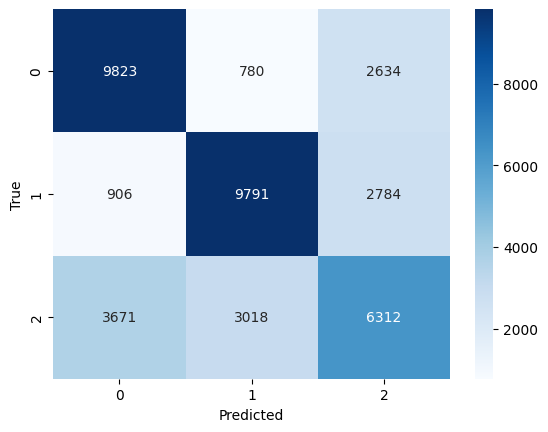

In [39]:
y_pred_train = arbol1.predict(x_train_arbol)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_train_arbol,y_pred_train))
print('F1-Score: {}'.format(f1_score(y_train_arbol, y_pred_train, average='micro')))

cm = confusion_matrix(y_train_arbol,y_pred_train)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

              precision    recall  f1-score   support

        alto       0.66      0.70      0.68      3294
        bajo       0.69      0.69      0.69      3405
       medio       0.50      0.46      0.48      3167

    accuracy                           0.62      9866
   macro avg       0.62      0.62      0.62      9866
weighted avg       0.62      0.62      0.62      9866

F1-Score: 0.6216298398540442


Text(50.722222222222214, 0.5, 'True')

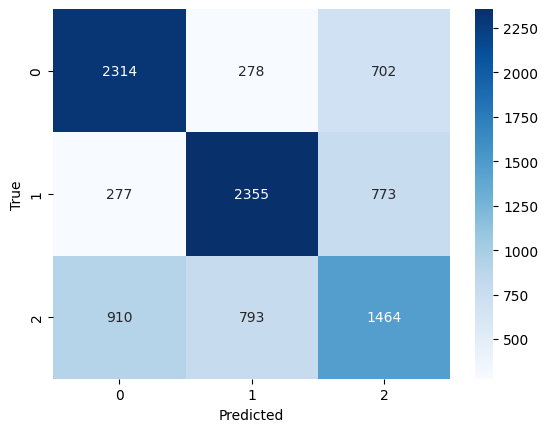

In [40]:
#Lo probamos en test
y_pred = arbol1.predict(x_test_arbol)

#Arbol Reporte y Matriz de Confusion
y_test_arbol = y_test_arbol.astype('str')
print(classification_report(y_test_arbol,y_pred))
print('F1-Score: {}'.format(f1_score(y_test_arbol, y_pred, average='micro')))

cm = confusion_matrix(y_test_arbol,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Vemos que al parecer el modelo entrenado con parámetros sin optimizar funciona muy bien en train. En test bajan un poco sus métricas pero no tanto.

**Optimizamos los hiperparámetros**
Tomamos 5 folds y como métrica F1 Score dado que evalúa tanto precisión como recall. Como tenemos +2 categorías tuvimos que elegir un average entre:
- macro: Calcula métricas para cada etiqueta y encuentre su media no ponderada. Esto no tiene en cuenta el desequilibrio de etiquetas.
- micro: Calcula métricas globalmente contando el total de verdaderos positivos, falsos negativos y falsos positivos.
- weighted: Calcula métricas para cada etiqueta y encuentra su promedio ponderado por soporte (la cantidad de instancias verdaderas para cada etiqueta). Con el promedio ponderado, el promedio de salida habría representado la contribución de cada clase ponderada por el número de ejemplos de esa clase dada.
(El soporte se refiere al número de ocurrencias reales de la clase en el conjunto de datos)

Elegimos micro dado que no tenemos clases desbalanceadas que necesitemos balancear.

In [41]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
import sklearn as sk

#Cantidad de combinaciones que queremos probar
n = 15

#Conjunto de parámetros que queremos usar
params = {'criterion':['gini','entropy'],
            'min_samples_leaf':list(range(2,10)),
            'min_samples_split': list(range(2,10)),
            'ccp_alpha':np.linspace(0,0.0005,n), 
            'max_depth':list(range(1,5)),
            }
                
#Cantidad de splits para el Cross Validation
folds = 5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier(random_state=2) 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score, average='micro')

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n, error_score='raise', random_state=2) 

#Buscamos los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train_arbol,y_train_arbol)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise',
                   estimator=DecisionTreeClassifier(random_state=2), n_iter=15,
                   param_distributions={'ccp_alpha': array([0.00000000e+00, 3.57142857e-05, 7.14285714e-05, 1.07142857e-04,
       1.42857143e-04, 1.78571429e-04, 2.14285714e-04, 2.50000000e-04,
       2.85714286e-04, 3.21428571e-04, 3.57142857e-04, 3.92857143e-04,
       4.28571429e-04, 4.64285714e-04, 5.00000000e-04]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9]},
                   random_state=2,
                   scoring=make_scorer(f1_score, average=micro))

A continuación mostramos los mejores parámetros y la mejor métrica que resultaron para el árbol de clasificación:

In [42]:
print(randomcv.best_params_)

print(randomcv.best_score_)

{'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 4, 'criterion': 'entropy', 'ccp_alpha': 0.00014285714285714287}
0.5429142230537596


Creamos un clasificador con los hiperparámetros resultantes de CV

In [43]:
#Creo el árbol con los mejores hiperparámetros
arbol = DecisionTreeClassifier(random_state=2).set_params(**randomcv.best_params_)
model_train = arbol.fit(x_train_arbol,y_train_arbol)
reglas = export_text(arbol, feature_names=list(x_train_arbol.columns))
print(reglas)

|--- latitud <= -34.60
|   |--- barrio_PUERTO MADERO <= 0.50
|   |   |--- barrio_CABALLITO <= 0.50
|   |   |   |--- property_type_Departamento <= 0.50
|   |   |   |   |--- class: bajo
|   |   |   |--- property_type_Departamento >  0.50
|   |   |   |   |--- class: bajo
|   |   |--- barrio_CABALLITO >  0.50
|   |   |   |--- latitud <= -34.61
|   |   |   |   |--- class: medio
|   |   |   |--- latitud >  -34.61
|   |   |   |   |--- class: bajo
|   |--- barrio_PUERTO MADERO >  0.50
|   |   |--- property_surface_total <= 81.50
|   |   |   |--- class: alto
|   |   |--- property_surface_total >  81.50
|   |   |   |--- longitud <= -58.36
|   |   |   |   |--- class: bajo
|   |   |   |--- longitud >  -58.36
|   |   |   |   |--- class: alto
|--- latitud >  -34.60
|   |--- property_surface_total <= 107.50
|   |   |--- longitud <= -58.46
|   |   |   |--- property_type_Departamento <= 0.50
|   |   |   |   |--- class: alto
|   |   |   |--- property_type_Departamento >  0.50
|   |   |   |   |--- class:

La primera división que realiza el árbol es respecto a la latitud (≈34.6 sur). En gran medida, esta latitud divide a la ciudad en 2, dejando una gran mayoría de los barrios de mayor poder adquisitivo (Recoleta, Palermo, Belgrano, Núñez, Villa Ortúzar, Villa Urquiza, parte de Villa Devoto, entre otros) en la mitad norte. En caso de haber quedado en la mitad sur, se realiza una división en función de si la propiedad pertenece al barrio de Puerto Madero o no, ya que si bien está en la mitad sur, Puerto Madero es de los barrios de mayor poder adquisitivo, sino el mayor. Dependiendo de esta respuesta se realizan algunas divisiones más para llegar a una conclusión más minuciosa.

En cuanto a las propiedades que quedaron en la mitad norte de la ciudad, se dividen las propiedades en función de la superficie total, y la longitud o superficie cubierta, siendo que aquellas propiedades con mucha superficie total y poca cubierta tienden a tener precios por m^2 menores, mientras (para la mitad norte), una menor superficie total el árbol lo asocia con un precio elevado. Esto se puede deber a que son zonas de alta demanda inmobiliaria, en las cuales se tienden a desarrollar departamentos los cuales poseen un gran porcentaje de su superficie total desarollada.

Este árbol es considerablemente menos profundo que el anterior, llegando a sus conclusiones con una fracción de las divisiones.

Matriz de confusión y performance en train

              precision    recall  f1-score   support

        alto       0.62      0.62      0.62     13237
        bajo       0.56      0.72      0.63     13481
       medio       0.41      0.28      0.33     13001

    accuracy                           0.54     39719
   macro avg       0.53      0.54      0.53     39719
weighted avg       0.53      0.54      0.53     39719

F1-Score: 0.5435685691986203


Text(50.722222222222214, 0.5, 'True')

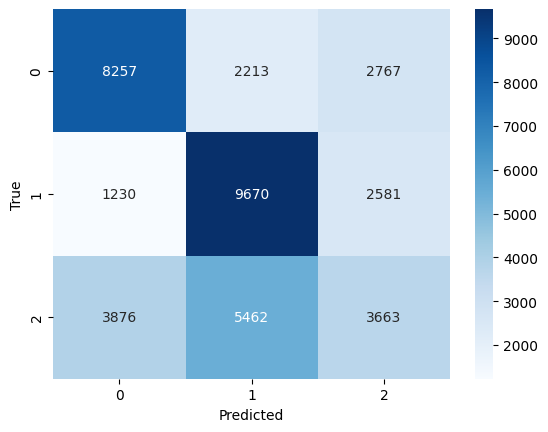

In [44]:
y_pred_train = arbol.predict(x_train_arbol)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_train_arbol,y_pred_train))
print('F1-Score: {}'.format(f1_score(y_train_arbol, y_pred_train, average='micro')))

cm = confusion_matrix(y_train_arbol,y_pred_train)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [45]:
plt.figure(figsize=(100,100))

tree_plot = tree.plot_tree(model_train,
                                 feature_names=x_train_arbol.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=model_train.classes_,
                                 max_depth=2) 
plt.show(tree_plot)

Matriz de confusión y performance en test

              precision    recall  f1-score   support

        alto       0.62      0.61      0.61      3294
        bajo       0.56      0.72      0.63      3405
       medio       0.41      0.30      0.35      3167

    accuracy                           0.55      9866
   macro avg       0.53      0.54      0.53      9866
weighted avg       0.53      0.55      0.53      9866

F1-Score: 0.546827488343807


Text(50.722222222222214, 0.5, 'True')

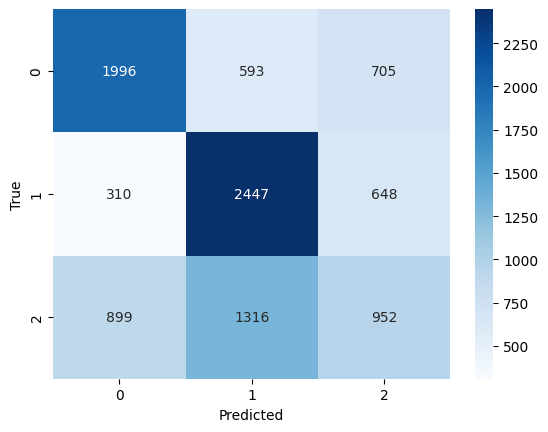

In [46]:
#Hago predicción sobre el set de evaluacion
y_pred = arbol.predict(x_test_arbol)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_test_arbol,y_pred))
print('F1-Score: {}'.format(f1_score(y_test_arbol, y_pred, average='micro')))

cm = confusion_matrix(y_test_arbol,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Conclusión: Las métricas en train y test son muy similares, sin embargo tiene muchas falencias para detectar la clase 2 (precio medio) en ambos casos. Intentamos mejorar los hiperparámetros pero obtuvimos los mismos resultados.
Es por esto que decidimos quedarnos con el modelo entrenado al principio de todo dado que producía mejores métricas incluso en test aunque bajaban un poco respecto de train. 

Graficamos el árbol elegido y vemos las features importance que usó para decidir

In [47]:
plt.figure(figsize=(100,100))

tree_plot = tree.plot_tree(model_train1,
                                 feature_names=x_train_arbol.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=model_train1.classes_,
                                 max_depth=2) #model.classes_
plt.show(tree_plot)

In [48]:
sorted(list(zip(x_train_arbol.columns.to_list(), model_train1.feature_importances_)), key=lambda x: -x[1])

[('latitud', 0.3639249925759836),
 ('property_surface_total', 0.20863635163995023),
 ('longitud', 0.1574669514493871),
 ('property_surface_covered', 0.10984945129574641),
 ('property_type_Departamento', 0.034878471086272754),
 ('barrio_PUERTO MADERO', 0.02798792616698453),
 ('barrio_CABALLITO', 0.018911234217651264),
 ('barrio_VILLA CRESPO', 0.016604601281675145),
 ('property_rooms', 0.01544822020548109),
 ('property_type_PH', 0.013368725960375789),
 ('barrio_COLEGIALES', 0.005050609154288913),
 ('property_type_Casa', 0.003497744122651292),
 ('barrio_CHACARITA', 0.0030576681558261935),
 ('barrio_BOCA', 0.003042456624851578),
 ('property_bedrooms', 0.0026144514130160717),
 ('barrio_VILLA DEVOTO', 0.002601305872157753),
 ('barrio_BALVANERA', 0.0023695142077255833),
 ('barrio_MONSERRAT', 0.0022558110099417665),
 ('barrio_COGHLAN', 0.0014442609069548825),
 ('barrio_ONCE', 0.001424465124325477),
 ('barrio_PARQUE PATRICIOS', 0.0011640340373959889),
 ('barrio_VILLA ORTUZAR', 0.000970463431134

Exportamos el modelo entrenado sobre train

In [49]:
decision_tree = 'models/arbol_decision.sav'
pickle.dump(model_train1, open(decision_tree, 'wb'))

Probaremos el modelo elegido sobre el data set reducido resultante de la notebook 1

In [53]:
#entrenamos
model_pca = model_train1.fit(ds_reducido_train, y_train_arbol)


In [54]:
#evaluamos
#sobre train
y_pred_train_pca = model_pca.predict(ds_reducido_train)
#sobre test
y_pred_test_pca = model_pca.predict(ds_reducido_test)

In [55]:
#exportamos el modelo reducido
decision_tree_red = 'models/arbol_decision_reducido.sav'
pickle.dump(model_pca, open(decision_tree_red, 'wb'))

              precision    recall  f1-score   support

        alto       0.63      0.70      0.66     13237
        bajo       0.64      0.68      0.66     13481
       medio       0.51      0.43      0.47     13001

    accuracy                           0.60     39719
   macro avg       0.59      0.60      0.60     39719
weighted avg       0.60      0.60      0.60     39719

F1-Score: 0.6020796092550165


Text(50.722222222222214, 0.5, 'True')

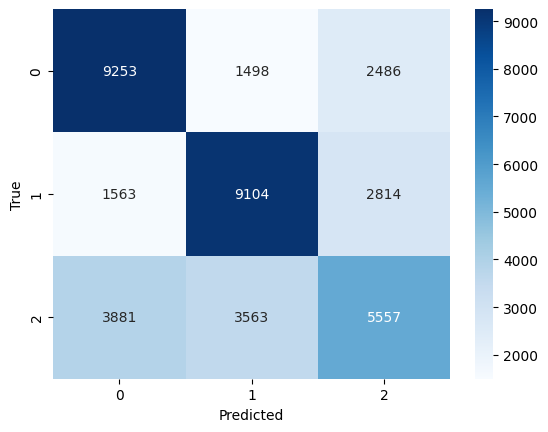

In [56]:
#métricas train
print(classification_report(y_train_arbol,y_pred_train_pca))
print('F1-Score: {}'.format(f1_score(y_train_arbol, y_pred_train_pca, average='micro')))

cm = confusion_matrix(y_train_arbol,y_pred_train_pca)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

              precision    recall  f1-score   support

        alto       0.60      0.65      0.63      3294
        bajo       0.62      0.65      0.63      3405
       medio       0.47      0.40      0.43      3167

    accuracy                           0.57      9866
   macro avg       0.56      0.57      0.56      9866
weighted avg       0.56      0.57      0.57      9866

F1-Score: 0.5708493817149808


Text(50.722222222222214, 0.5, 'True')

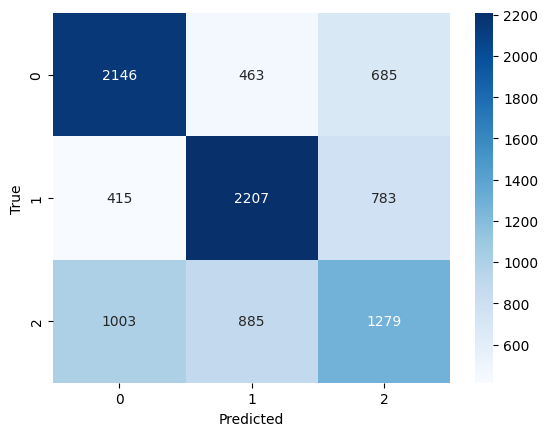

In [57]:
#métricas test
print(classification_report(y_test_arbol,y_pred_test_pca))
print('F1-Score: {}'.format(f1_score(y_test_arbol, y_pred_test_pca, average='micro')))

cm = confusion_matrix(y_test_arbol,y_pred_test_pca)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Vemos que las métricas con el ds reducido son muy similares a las del data set sin PCA, podemos concluír que aplicar estos métodos resulta muy beneficioso porque trabajamos con menos data obteniendo conclusiones similares.

### Modelo 2: Random Forest

Este modelo no hace uso de un único árbol, sino de un conjunto de k arboles, sobre los cuales se resuelve un problema de clasificación.  Cada árbol resuelve el mismo problema, dada una entrada devuelve una clasificación para la misma (en el caso del dataset estudiado, si la variable tipo_precio es baja, media o alta) .

El resultado final, y por lo tanto, la clasificación deseada, se obtiene a partir de la selección de la clasificación mas frecuente entre todas las clasificaciones realizadas por los k arboles.

Cada árbol se construye de la siguiente forma:

Dado que el número de casos en el conjunto entrenamiento es N, se toma aleatoramiente una muestra de esos N casos, obteniendo subconjuntos de datos a partir del conjunto original. Dichos subconjuntos son de menor tamaño que el orignal; se arman con aproximadamente 2/3 filas del conjunto original (cada uno), escogiendo algunas columnas del mismo.

Si existen M variables de entrada, un número m < M se especifica tal que para cada nodo, m variables se seleccionan aleatoriamente de M. La mejor división de estos m atributos es usado para ramificar el árbol. El valor m se mantiene constante durante la generación de todo el bosque.

Para cada subconjunto obtenido se entrena un árbol. Para cada uno se calcula su tasa error, escogiendo el árbol con menor error de todo el grupo. Este proceso se repite k veces.

Cada árbol crece hasta su máxima extensión posible y NO hay proceso de poda. Nuevas instancias se predicen a partir de la agregación de las predicciones de los x árboles (i.e., mayoría de votos para clasificación, promedio para regresión)

El resultado final son los k arboles que resuelven el problema de clasificación.

Importamos todas las librerías que vamos a necesitar

In [58]:
!pip install 'dtreeviz'

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Separamos de vuelta de train y test:

Creamos el clasificador y entreno el modelo

In [59]:
rfc_default = RandomForestClassifier(random_state=2)
rfc_default.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

Creamos un clasificador con hiperparámetros arbitrarios, ya que después vamos a buscar los mejores, y después entrenamos el modelo.

In [60]:
rfc = RandomForestClassifier(max_features='auto', 
                             oob_score=True, 
                             random_state=2, 
                             n_jobs=-1, 
                             min_samples_leaf=5,
                             min_samples_split=5,
                             n_estimators=50 )
model = rfc.fit(X = x_train_arbol, y = y_train_arbol)

Hacemos una predicción sobre el dataset de train:

In [61]:
y_pred_train = model.predict(x_train_arbol)
y_pred_train

array(['bajo', 'medio', 'alto', ..., 'medio', 'bajo', 'medio'],
      dtype=object)

Y una predicción sobre el set de test:

In [62]:
y_pred_test = model.predict(x_test_arbol)
y_pred_test

array(['medio', 'alto', 'bajo', ..., 'alto', 'alto', 'bajo'], dtype=object)

y lo comparamos respectivamente con los valores reales

In [63]:
y_test.values

array(['medio', 'alto', 'bajo', ..., 'alto', 'medio', 'medio'],
      dtype=object)

In [64]:
ds_resultados=pd.DataFrame(zip(y_test,y_pred_train),columns=['train','pred'])
ds_resultados.head()

train   pred
0  medio   bajo
1   alto  medio
2   bajo   alto
3   bajo  medio
4   alto   alto

In [65]:
ds_resultados=pd.DataFrame(zip(y_test,y_pred_test),columns=['test','pred'])
ds_resultados.head()

test   pred
0  medio  medio
1   alto   alto
2   bajo   bajo
3   bajo   bajo
4   alto  medio

Mostramos a traves de una matriz de heatmap comparando los valores predichos con los de train.

Text(50.722222222222214, 0.5, 'True')

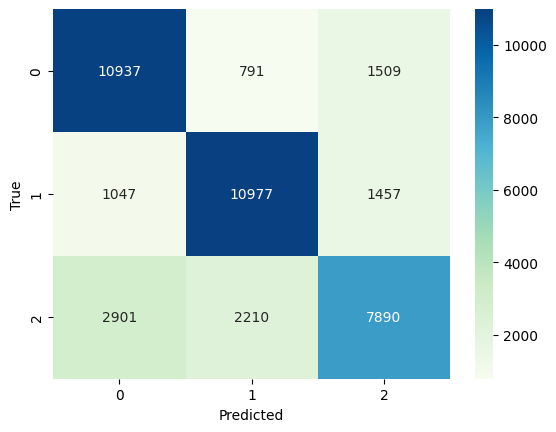

In [66]:
tabla=confusion_matrix(y_train_arbol, y_pred_train)

sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Mostramos a traves de una matriz de heatmap comparando los valores predichos con los de tests.

Text(50.722222222222214, 0.5, 'True')

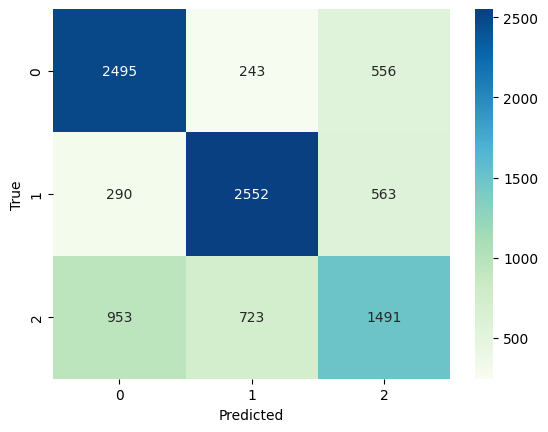

In [67]:
tabla=confusion_matrix(y_test_arbol, y_pred_test)

sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Por este gráfico de heatmap podemos ver que detecta muy bien el valor de alto y bajo, podemos decir que tiene un buen accuracy para detectar dicho tipo, pero para el caso de medio se observa una menor acurracy en la predicción tal como sucedía con el árbol de decisión pero acá en menor medida.

Tomamos las métricas.  

Primero con el conjunto de train:

In [68]:
print(classification_report(y_train_arbol,y_pred_train))

              precision    recall  f1-score   support

        alto       0.73      0.83      0.78     13237
        bajo       0.79      0.81      0.80     13481
       medio       0.73      0.61      0.66     13001

    accuracy                           0.75     39719
   macro avg       0.75      0.75      0.75     39719
weighted avg       0.75      0.75      0.75     39719



y con el conjunto de test:

In [69]:
print(classification_report(y_test_arbol,y_pred_test))

              precision    recall  f1-score   support

        alto       0.67      0.76      0.71      3294
        bajo       0.73      0.75      0.74      3405
       medio       0.57      0.47      0.52      3167

    accuracy                           0.66      9866
   macro avg       0.65      0.66      0.65      9866
weighted avg       0.66      0.66      0.66      9866



Podemos ver que comparando ambas métricas, obtenemos métricas menores en el conjunto de test.

Estas son las métricas base, a través de la búsqueda de hiperparametros vamos a mejorarlas y explicar cada una de ellas.

Importancia de Atributos

In [70]:
sorted(list(zip(x_train_arbol.columns.to_list(), model.feature_importances_)), key=lambda x: -x[1])

[('latitud', 0.2855771139152432),
 ('property_surface_total', 0.2032966156215521),
 ('longitud', 0.15351030220632403),
 ('property_surface_covered', 0.09883629188333953),
 ('barrio_PALERMO', 0.044040534339137336),
 ('property_rooms', 0.027976693504133628),
 ('barrio_PUERTO MADERO', 0.017064586528690785),
 ('property_type_Departamento', 0.016601768634568168),
 ('barrio_BELGRANO', 0.01536494323327205),
 ('property_bedrooms', 0.015179048284404655),
 ('property_type_PH', 0.011169089513249962),
 ('barrio_RECOLETA', 0.010013195284150445),
 ('barrio_CABALLITO', 0.0081295152635535),
 ('barrio_BALVANERA', 0.006781378604025264),
 ('property_type_Casa', 0.006516770887655006),
 ('barrio_FLORES', 0.005145950515939828),
 ('barrio_SAN CRISTOBAL', 0.004639661676796488),
 ('barrio_NUÑEZ', 0.004617631743002858),
 ('barrio_VILLA URQUIZA', 0.0042681828275031595),
 ('barrio_VILLA CRESPO', 0.003968494884089645),
 ('barrio_VILLA DEVOTO', 0.0038650621188069468),
 ('barrio_FLORESTA', 0.003505174149745452),
 ('

Aca estamos evaluando la importancia en los 50 arboles que generamos en conjunto. Podemos ver que el feature latitud tiene la importancia mas alta, por lo que nos permite graficar mejor. Esto se puede explicar, ya que como podemos ver en el mapa de Caba, hay una clara discretización agrupación de los tipos de precio con las zonas. Por ejemplo, se puede ver una conglomeración de puntos verdes por la zona de Palermo, por lo que no seria sorpresa que por esa zona haya un punto verde.

Busqueda de Hiperparámetros 

Al igual que en el árbol de decisión tomamos la metrica de f1 score con un average de micro ya que no tenemos clases desbalanceadas porque utilizamos la alterantiva de frecuencias iguales, utilizando 5 folds. 

In [71]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
import sklearn as sk


base_tree = RandomForestClassifier(oob_score=True, random_state=2, n_jobs=-1) 

#Cantidad de combinaciones que queremos probar
n = 10

#Conjunto de parámetros que queremos usar
params = {'criterion':['gini','entropy'],
            'max_features':['auto', 'sqrt', 'log2'],   
            'min_samples_leaf': [1,5,10],
            'min_samples_split':[2,4,10,12,14,16],
            'n_estimators':[10,15,19,20,30]
            }

#Cantidad de splits para el Cross Validation
folds = 5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score, average='micro')

#Random Search Cross Validation
randomcvRF = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n, error_score='raise', random_state=2) 

#Buscamos los hiperparamtros que optimizan F1 Score
randomcvRF.fit(x_train_arbol,y_train_arbol)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise',
                   estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=2),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 4, 10, 12, 14,
                                                              16],
                                        'n_estimators': [10, 15, 19, 20, 30]},
                   random_state=2,
                   scoring=make_scorer(f1_score, average=micro))

Mostramos los mejores parámetros obtenidos con Random CrossValidation

In [72]:
randomcvRF.best_params_

{'n_estimators': 15,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'criterion': 'entropy'}

Mostramos la mejor métrica

In [73]:
print("score en entrenamiento con cv: " + str(randomcvRF.best_score_))

score en entrenamiento con cv: 0.6667340874982994


Ahora entrenamos el modelo con los mejores hiperparametros

In [74]:
rf_cv_best=randomcvRF.best_estimator_
y_pred_rf_cv_best_test = rf_cv_best.predict(x_test_arbol) #evaluó en test

Graficamos el arbol:

Mostramos las clases y qué parámetros tiene

In [75]:
rf_cv_best.classes_

array(['alto', 'bajo', 'medio'], dtype=object)

In [76]:
rf_cv_best.estimators_[2] #elegimos un arbol de los n generados

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=14, random_state=111352301)

Mostramos las importancias de los atributos árbol y luego lo graficamos

In [77]:
sorted(list(zip(x_train_arbol.columns.to_list(), rf_cv_best.feature_importances_)), key=lambda x: -x[1])

[('latitud', 0.26996725296732527),
 ('property_surface_total', 0.2008441188611082),
 ('longitud', 0.17902059694449138),
 ('property_surface_covered', 0.1340986330067157),
 ('property_rooms', 0.03416964781837031),
 ('barrio_PALERMO', 0.01648238866400809),
 ('property_type_Departamento', 0.015367024122983916),
 ('property_bedrooms', 0.012800405058164155),
 ('barrio_PUERTO MADERO', 0.010443834089649344),
 ('barrio_BELGRANO', 0.009316646307080944),
 ('property_type_PH', 0.00913928419824942),
 ('barrio_CABALLITO', 0.007711107979013947),
 ('property_type_Casa', 0.005633077720528014),
 ('barrio_RECOLETA', 0.0050604532687703995),
 ('barrio_VILLA CRESPO', 0.004914990986532652),
 ('barrio_SAN CRISTOBAL', 0.004237322858009471),
 ('barrio_FLORES', 0.004121210364061137),
 ('barrio_BALVANERA', 0.004051566009195943),
 ('barrio_VILLA URQUIZA', 0.004009873639850153),
 ('barrio_VILLA DEVOTO', 0.0036227935599965648),
 ('barrio_NUÑEZ', 0.003234426800041488),
 ('barrio_ALMAGRO', 0.0031327182544937503),
 ('

En el árbol, el atributo de mayor importancia es la latitud, por lo tanto la primera división se realiza en base a este atributo. Luego se divide en función del atributo property_surface_total.  Y así sucesivamente teniendo en cuenta la importancia de cada uno de los atributos. Se observa que al ser la latitud el atributo de mayor importancia, el árbol dividiría a la ciudad en partes al igual que algunos de los árboles de decisión previamente calculados.

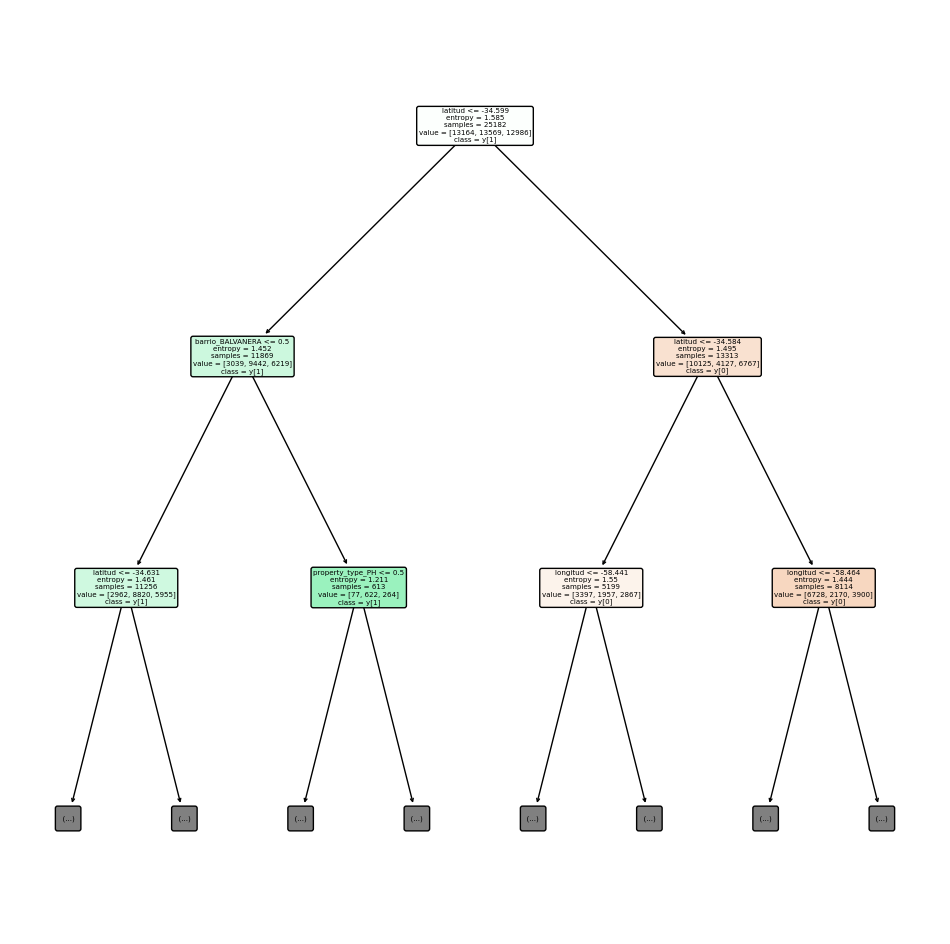

In [78]:
#mostramos un árbol en particular
plt.figure(figsize=(12,12))

tree_plot=tree.plot_tree(rf_cv_best.estimators_[2],
                         max_depth=2,
                         feature_names=x_train_arbol.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

Con los valores predichos y los de tests armamos una tabla de confusión para mostrar cuán acertado estuvo el modelo.

Text(50.722222222222214, 0.5, 'True')

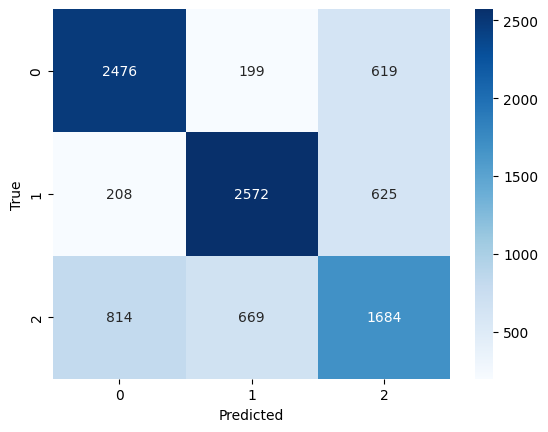

In [79]:
tabla=confusion_matrix(y_test_arbol,y_pred_rf_cv_best_test)
sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Mediante este heatmap se puede ver que al obtener los mejores hiperparametros, pudimos obtener una clara mejoría de la precisión del árbol comparando el test con el predicho.

Podemos ver que seguimos teniendo un buen resultado para las columnas de alto y bajo, pero hay un leve retroceso del rendimiento para predecir la clase medio,  por lo que la accuracy nos podria llegar a estar mintiendo.

In [80]:
print(classification_report(y_test_arbol,y_pred_rf_cv_best_test))

              precision    recall  f1-score   support

        alto       0.71      0.75      0.73      3294
        bajo       0.75      0.76      0.75      3405
       medio       0.58      0.53      0.55      3167

    accuracy                           0.68      9866
   macro avg       0.68      0.68      0.68      9866
weighted avg       0.68      0.68      0.68      9866



Podemos ver que la precisión (numero de true positives dividido por la cantidad de todos los resultados positivos (true positive), incluyendo aquellos que no se identificaron correctamente(false positive)) de la columna de tipo "medio" es mas baja con respecto a la de alto y bajo. Se puede confirmar  mirando el heatmap en la ultima fila, donde el porcentaje de aciertos sobre el total es menor que el de alto y bajo.   

Para el caso de recall (numero de true positives dividido por el numero de ejemplos que deberian de haber sido identificados como positivos(true positive + false negative)) pasa algo similar con las 3 tipos de precio, tomando una menor proporcion en el caso del tipo "medio".

Despues tenemos el f1 score que seria la media armónica entre la presicion y el recall.

La accuracy del modelo es bastante buena, esta es fracción de predicciones que el modelo realizó correctamente sobre el total, por lo que no nos dice mucho de cada tipo por separado.

Por otro lado, macro average utiliza la media aritmetica para todas las metricas del f1 score. Esta métrica es la mas directa para mostrarnos como esta funcionando el modelo, y en nuestro caso, es bastante buena.

Por ultimo tenemos el weighted average que es similar al macro average pero toma en cuenta el support de cada metrica del f1score para dar un resultado, nuevamente nos dio bastante bien para todas las metricas evaluadas.

Hacemos lo mismo para el conjunto de train:

In [81]:
rf_cv_best=randomcvRF.best_estimator_
y_pred_rf_cv_best_train = rf_cv_best.predict(x_train_arbol)

Text(50.722222222222214, 0.5, 'True')

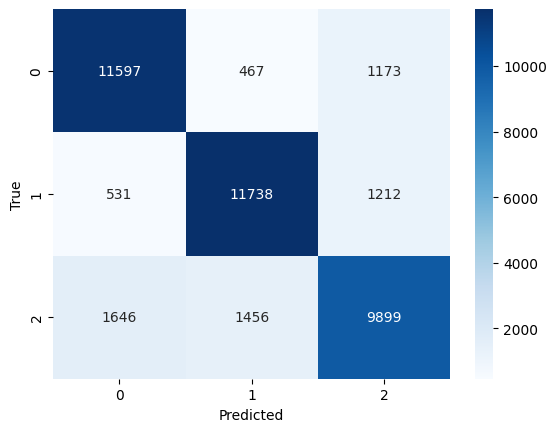

In [82]:
tabla=confusion_matrix(y_train_arbol,y_pred_rf_cv_best_train)
sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [83]:
print(classification_report(y_train_arbol,y_pred_rf_cv_best_train))

              precision    recall  f1-score   support

        alto       0.84      0.88      0.86     13237
        bajo       0.86      0.87      0.86     13481
       medio       0.81      0.76      0.78     13001

    accuracy                           0.84     39719
   macro avg       0.84      0.84      0.84     39719
weighted avg       0.84      0.84      0.84     39719



En comparacion con el conjunto de test, en el conjunto de train obtenemos una muy buena prediccion con respecto a los datos iniciales. En conjunto a esto, obtuvimos un buen reporte de las metricas previamente explicadas. Seguimos teniendo una baja de métricas para la clase medio.

In [84]:
random_forest = 'models/random_forest.sav'
pickle.dump(rf_cv_best, open(random_forest, 'wb'))

Vamos a entrenar el modelo sobre el ds reducido por PCA:

In [85]:
rf_cv_best=randomcvRF.best_estimator_
model_pca = rf_cv_best.fit(ds_reducido_train, y_train_arbol)
y_pred_rf_cv_best_train_pca = model_pca.predict(ds_reducido_train)
y_pred_rf_cv_best_test_pca = model_pca.predict(ds_reducido_test)

In [87]:
#exportamos el modelo
random_red = 'models/random_forest_reducido.sav'
pickle.dump(model_pca, open(random_red, 'wb'))

Evaluamos las métricas para test y train 

              precision    recall  f1-score   support

        alto       0.85      0.87      0.86     13237
        bajo       0.85      0.87      0.86     13481
       medio       0.84      0.79      0.81     13001

    accuracy                           0.85     39719
   macro avg       0.85      0.85      0.84     39719
weighted avg       0.85      0.85      0.85     39719



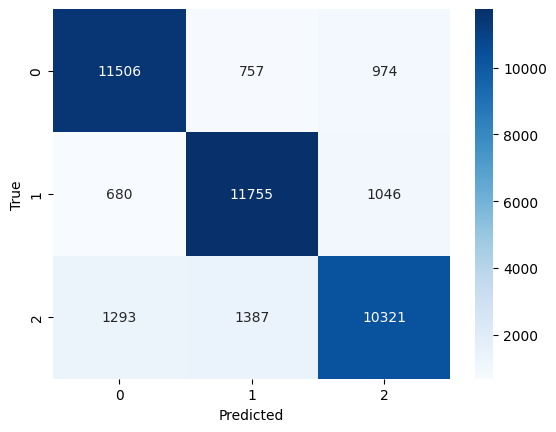

In [88]:
tabla=confusion_matrix(y_train_arbol,y_pred_rf_cv_best_train_pca)
sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report(y_train_arbol,y_pred_rf_cv_best_train_pca))


              precision    recall  f1-score   support

        alto       0.69      0.71      0.70      3294
        bajo       0.68      0.71      0.69      3405
       medio       0.57      0.53      0.55      3167

    accuracy                           0.65      9866
   macro avg       0.65      0.65      0.65      9866
weighted avg       0.65      0.65      0.65      9866



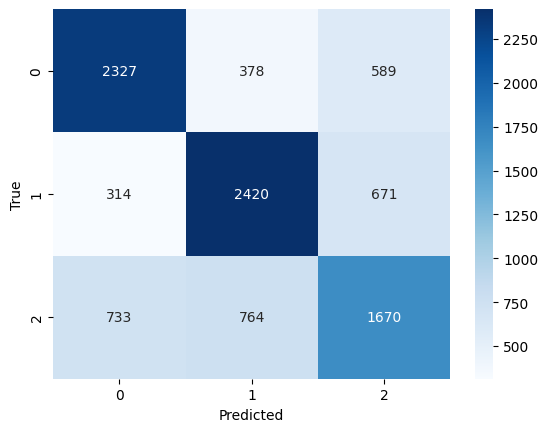

In [89]:
tabla=confusion_matrix(y_test_arbol,y_pred_rf_cv_best_test_pca)
sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report(y_test_arbol,y_pred_rf_cv_best_test_pca))

Podemos notar cierto overfit del modelo entrenado en el conjunto de PCA.

## Modelo 3: KNN

El algoritmo K-Nearest Neighbors, o simplemente KNN, es un algoritmo el cual, dado un punto y evaluando sus "k" vecinos para encontrar similitudes, intenta predecir un atributo o propiedad de dicho punto. Se puede utilizar para clasificación o regresión.

El algoritmo se basa en la idea de que los puntos de propiedades similares se encontrarán a poca distancia entre sí, mientras que, a mayor desemejanza, mayor distancia. Esta distancia no es necesariamente la euclideana, sino que se pueden utilizar diversos tipos de distancia.

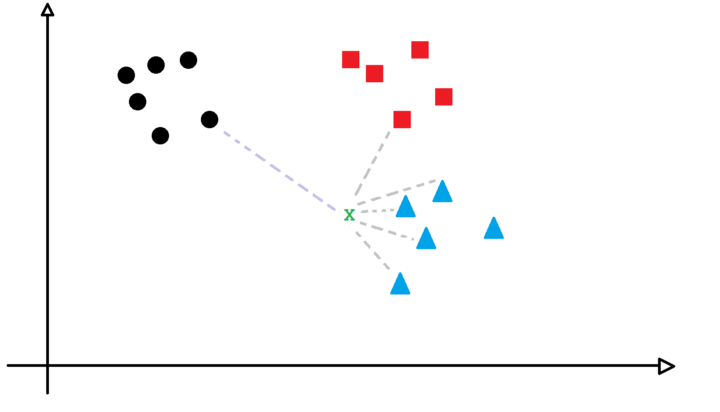
En el ejemplo de arriba, se puede observar que 4 de los puntos más cercanos al punto que se busca clasificar (la X) son triángulos azules, mientras que la distancia a los círculos negros y cuadrados rojos es considerablemente mayor. Es en base a este sencillo análisis que se podría predecir que el punto X es un triángulo azul.

Importamos las librerías que usaremos:

In [90]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Separamos los conjuntos de Train y Test

In [91]:
x_train_KNN = x_train_arbol
y_train_KNN = y_train_arbol
x_test_KNN = x_test_arbol
y_test_KNN = y_test_arbol

A continuación se crea el clasificador KNN con los parámetros por defecto.

In [92]:
#Crear el modelo
KNN_Classifier = KNeighborsClassifier()

#vemos sus parámetros
KNN_Classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Se puede observar que, entre algunos de los hiperparámetros con los que cuenta el clasificador, se destacan **metric**, que representa el tipo de distancia a calcular (en este caso Minkowski); y **weigth**, que representa la influencia de cada punto en función de la distancia (en este caso, al ser uniforme, a cada vecino se le asigna el mismo peso). 

Se entrena el modelo con Cross Validation y se realiza una predicción en base al set de testing separado en un inicio.

In [93]:
#Entrenar el modelo
KNN_Classifier.fit(x_train_KNN, y_train_KNN)
#Predicción sobre train
y_pred_train_KNN = KNN_Classifier.predict(x_train_KNN)
#Predicción sobre test
y_pred_test_KNN = KNN_Classifier.predict(x_test_KNN)

In [94]:
#exportamos el modelo
knn = 'models/knn_clasificacion.sav'
pickle.dump(KNN_Classifier, open(knn, 'wb'))

              precision    recall  f1-score   support

        alto       0.70      0.81      0.75     13237
        bajo       0.77      0.77      0.77     13481
       medio       0.71      0.60      0.65     13001

    accuracy                           0.73     39719
   macro avg       0.73      0.73      0.72     39719
weighted avg       0.73      0.73      0.72     39719



Text(50.722222222222214, 0.5, 'True')

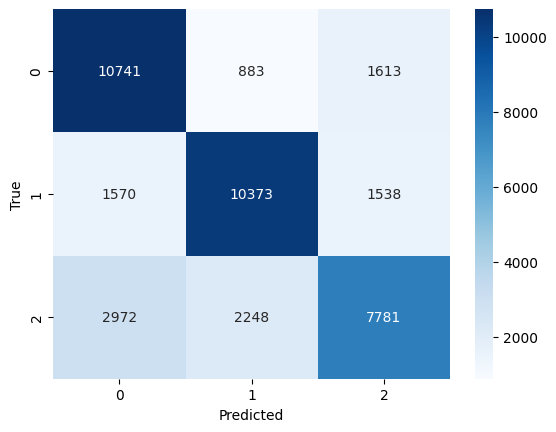

In [95]:
#Reporte de Clasificación sobre train
print(classification_report(y_train_KNN,y_pred_train_KNN))

#Matriz de Confusión
cm = confusion_matrix(y_train_KNN,y_pred_train_KNN)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

              precision    recall  f1-score   support

        alto       0.60      0.70      0.65      3294
        bajo       0.67      0.65      0.66      3405
       medio       0.53      0.45      0.49      3167

    accuracy                           0.60      9866
   macro avg       0.60      0.60      0.60      9866
weighted avg       0.60      0.60      0.60      9866



Text(50.722222222222214, 0.5, 'True')

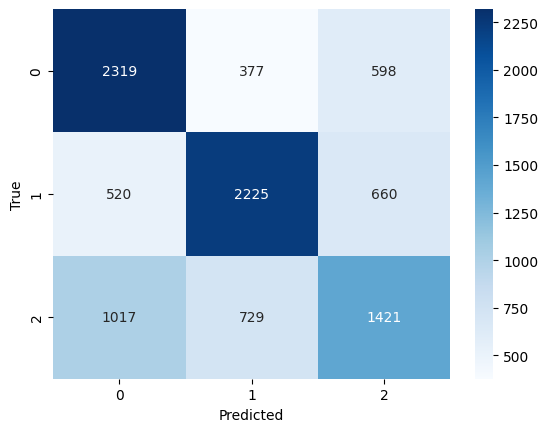

In [96]:
#Reporte de Clasificación sobre train
print(classification_report(y_test_KNN,y_pred_test_KNN))

#Matriz de Confusión
cm = confusion_matrix(y_test_KNN,y_pred_test_KNN)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [97]:
#Cantidad de aciertos
print('correctas: ', np.sum(y_test_KNN == y_pred_test_KNN))
print('total: ', len(y_test_KNN))

correctas:  5965
total:  9866


Se puede observar que, de 9866 predicciones totales, hubo 5965 entradas clasificadas correctamente, lo cual equivale a una precisión del 60.5%, aproximadamente, lo cual es bastante pobre.

In [98]:
accuracy_score(y_test_KNN,y_pred_test_KNN)

0.604601662274478

A fin de mejorar el modelo, se procede a entrenar distintos modelos los cuales toman una cantidad incremental de vecinos para calcular las distancias. De esta forma se puede observar gráficamente cuál es el mejor valor para settear como hiperparámetro de la cantidad de nodos vecinos.

In [99]:
metrics = []

for n in range(1,15):  #El algoritmo tarda una buena cantidad de tiempo con un rango de 1 a 15.
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train_KNN, y_train_KNN)
    y_pred = knn.predict(x_test_KNN)
    metrics.append((n, (y_test_KNN == y_pred).sum()))

Se grafica la relación entre precisión y número de vecinos.

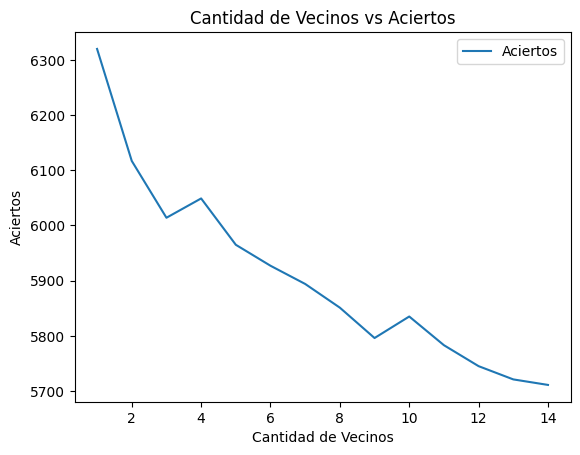

In [100]:
df_metrics = pd.DataFrame(metrics, columns=['Cantidad de Vecinos', "Aciertos"])

ax = df_metrics.plot(x="Cantidad de Vecinos", y="Aciertos", title = "Cantidad de Vecinos vs Aciertos")
ax.set_ylabel("Aciertos")
ax.set_xlabel("Cantidad de Vecinos")
plt.show()

Vemos una pendiente negativa por lo que a menor cantidad de vecinos mejor. En 4 notamos una subida por lo que es buen cadidato.

Se decide probar la variación haciendo uso de Cross-Validation.

In [101]:
from sklearn.model_selection import cross_val_score

k_range=range(1,5) #cantidad de vecinos a probar

k_scores=[] # accuracy para cada K utilizado

for k in k_range:
    #clasificador Knn
    knn=KNeighborsClassifier(n_neighbors=k)
    #uso 10 folds
    scores=cross_val_score(knn,x_train_KNN,y_train_KNN,cv=10,scoring='accuracy')
    #promedio las 10 métricas
    k_scores.append(scores.mean())

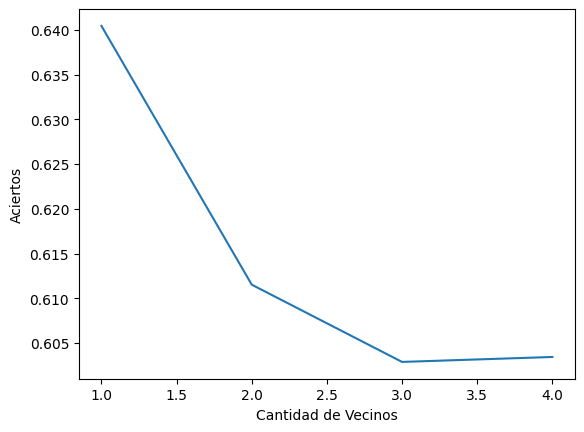

In [102]:
plt.plot(k_range, k_scores)
plt.xlabel("Cantidad de Vecinos")
plt.ylabel("Aciertos")
plt.show()

Se puede notar que no es lo mismo dejar un valor arbitrario de cantidad de vecinos, ya que hay una tendencia a que la performance descienda a medida que que aumenta la cantidad de vecinos. Se puede observar que la excepción a esta regla ocurre con 2 o 4 como cantidad de vecinos. Si bien en 1 la predicción es lo más alta, esto resulta susceptible a overfitting.

Optimización de Hiperparámetros

El número de vecinos no es el único hiperparámetro que se puede optimizar. Entre algunos otros se encuentran:

**algorithm:** algoritmo utilizado para calcular los vecinos más cercanos.
**brute:** utilizará una búsqueda de fuerza bruta.
**metric:** Tipo de distancia (euclidea, minkowski, manhattan, etc).
**weights:** Relación entre influencia de un vecino y la distancia al punto a predecir.

Se realiza una búsqueda de los mejores hiperparámetros para número de vecinos, peso, algoritmo y distancia. Si bien hay una gran cantidad de posibles distancias para utilizar, distancia euclidea, manhattan y chebyshev son métricas válidas tanto para los algoritmos de ball_tree, kd_tree y brute.

In [105]:
from sklearn.model_selection import RandomizedSearchCV

#Grilla de Parámetros
params_grid={ 'n_neighbors':range(3,6), 
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','chebyshev', 'manhattan']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 5 Folds y 5 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=5, scoring='accuracy', n_iter=5, random_state=2)

rand.fit(x_train_KNN, y_train_KNN)
rand.cv_results_['mean_test_score']

array([0.63966879, 0.55180139, 0.63778052, 0.58198862, 0.60228114])

In [106]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan', 'algorithm': 'kd_tree'}
0.6396687900536031


Se puede observar que el valor de la cantidad de vecinos fue optimizada en 4, lo cual coincide con la observación realizada con anterioridad.

A continuación se realizan las predicciones con este nuevo modelo y se calcula su performance, la cual es de un 65% de aciertos.

In [107]:
#Mejor estimador
best_knn=rand.best_estimator_
#predecimos en train 
y_pred_KNN_clasificacion_train=best_knn.predict(x_train_KNN)

#Predicción con mejor estimador
y_pred_KNN_clasificacion=best_knn.predict(x_test_KNN)

#Accuracy test
accuracy_score(y_test_KNN,y_pred_KNN_clasificacion)

0.6557875532130549

              precision    recall  f1-score   support

        alto       0.96      0.99      0.98     13237
        bajo       0.97      0.99      0.98     13481
       medio       0.98      0.93      0.96     13001

    accuracy                           0.97     39719
   macro avg       0.97      0.97      0.97     39719
weighted avg       0.97      0.97      0.97     39719



Text(50.722222222222214, 0.5, 'True')

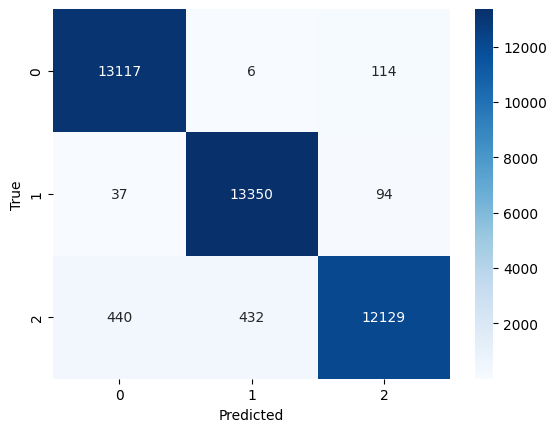

In [108]:
#Reporte de Clasificación sobre train
print(classification_report(y_train_KNN,y_pred_KNN_clasificacion_train))

#Matriz de Confusión
cm = confusion_matrix(y_train_KNN,y_pred_KNN_clasificacion_train)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

              precision    recall  f1-score   support

        alto       0.69      0.71      0.70      3294
        bajo       0.71      0.71      0.71      3405
       medio       0.56      0.55      0.55      3167

    accuracy                           0.66      9866
   macro avg       0.65      0.65      0.65      9866
weighted avg       0.65      0.66      0.66      9866



Text(50.722222222222214, 0.5, 'True')

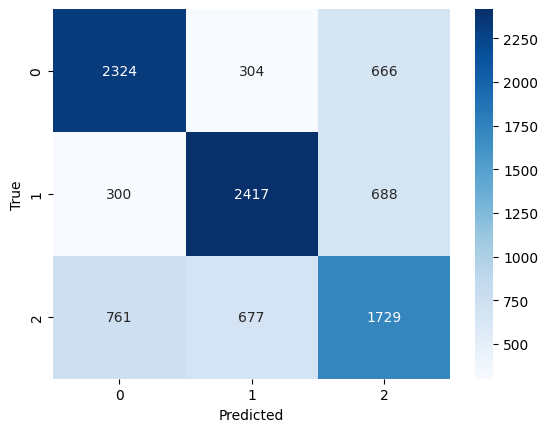

In [109]:
#Reporte de Clasificación sobre test
print(classification_report(y_test_KNN,y_pred_KNN_clasificacion))

#Matriz de Confusión
cm = confusion_matrix(y_test_KNN,y_pred_KNN_clasificacion)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

A continuación entrenamos el modelo sobre el ds reducido por PCA:

In [110]:
KNN_cv_best = rand.best_estimator_
model_pca_KNN = KNN_cv_best.fit(ds_reducido_train, y_train_KNN)
y_pred_KNN_best_train_pca = model_pca_KNN.predict(ds_reducido_train)
y_pred_KNN_best_test_pca = model_pca_KNN.predict(ds_reducido_test)

              precision    recall  f1-score   support

        alto       0.96      0.99      0.97     13237
        bajo       0.96      0.99      0.98     13481
       medio       0.98      0.92      0.95     13001

    accuracy                           0.97     39719
   macro avg       0.97      0.97      0.97     39719
weighted avg       0.97      0.97      0.97     39719



Text(50.722222222222214, 0.5, 'True')

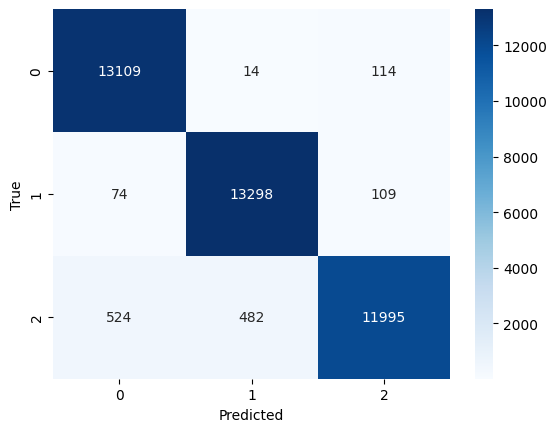

In [111]:
#Reporte de Clasificación
print(classification_report(y_train_KNN,y_pred_KNN_best_train_pca))

#Matriz de Confusión
cm = confusion_matrix(y_train_KNN,y_pred_KNN_best_train_pca)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

              precision    recall  f1-score   support

        alto       0.70      0.72      0.71      3294
        bajo       0.70      0.70      0.70      3405
       medio       0.58      0.56      0.57      3167

    accuracy                           0.66      9866
   macro avg       0.66      0.66      0.66      9866
weighted avg       0.66      0.66      0.66      9866



Text(50.722222222222214, 0.5, 'True')

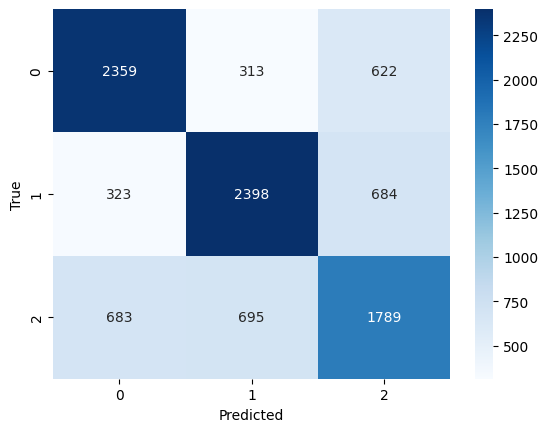

In [112]:
#Reporte de Clasificación
print(classification_report(y_test_KNN,y_pred_KNN_best_test_pca))

#Matriz de Confusión
cm = confusion_matrix(y_test_KNN,y_pred_KNN_best_test_pca)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

## Modelo que elegiríamos para predecir el tipo de precio

Árbol de decisión sobre test:


![árbol de decisión](image-20221102-175646.png)

Random forest sobre test:

![random forest](image-20221102-175738.png)

Knn sobre test:

![knn](image-20221102-175929.png)

Entre cada uno de los modelos entrenados (árbol de decisión, random forest, y KNN), se observar que Random Forest fue no por amplia diferencia, el modelo que mejor predijo cada uno de los valores con los que se lo probó. Obtuvo la mejor accuracy (0.68). Si bien los otros modelos poseen métricas similares, elegimos quedarnos con este porque además toma mucho menos tiempo de entrenamiento y predicción que los demás.

Sin embargo, nos hubiera gustado obtener mejores métricas en todos los casos pero no lo logramos después de probar varias combinaciones de hiperparámetros.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fcb02109-3268-4805-81b4-1fba96795907' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>